# Name = Divyanshu_Singh

# Batch = DS2306

.

.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

.

In [2]:
df = pd.read_csv('zomato.csv',encoding=('ISO-8859-1'))
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
df.isnull().sum()/df.shape[0]*100

Restaurant ID           0.000000
Restaurant Name         0.000000
Country Code            0.000000
City                    0.000000
Address                 0.000000
Locality                0.000000
Locality Verbose        0.000000
Longitude               0.000000
Latitude                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Currency                0.000000
Has Table booking       0.000000
Has Online delivery     0.000000
Is delivering now       0.000000
Switch to order menu    0.000000
Price range             0.000000
Aggregate rating        0.000000
Rating color            0.000000
Rating text             0.000000
Votes                   0.000000
dtype: float64

In [5]:
# 9 null values present

In [6]:
df=df.dropna()

In [7]:
df=df.replace('?',np.nan)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
# There were not any "?" present in this

In [12]:
df.duplicated().sum()

0

In [13]:
# lets check categorical columns
for col in df.columns:
    print(col," : ",len(df[col].unique()))

Restaurant ID  :  9542
Restaurant Name  :  7437
Country Code  :  15
City  :  140
Address  :  8910
Locality  :  1206
Locality Verbose  :  1263
Longitude  :  8111
Latitude  :  8668
Cuisines  :  1825
Average Cost for two  :  140
Currency  :  12
Has Table booking  :  2
Has Online delivery  :  2
Is delivering now  :  2
Switch to order menu  :  1
Price range  :  4
Aggregate rating  :  33
Rating color  :  6
Rating text  :  6
Votes  :  1012


In [14]:
df.nunique()

Restaurant ID           9542
Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

.

.

.

In [15]:
df1 = df.copy()

In [16]:
# Restaurant Name and Restaurant ID are of no use to us
df1= df1.drop(['Restaurant ID','Restaurant Name'],axis=1)

In [17]:
df1.columns

Index(['Country Code', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [18]:
nunique =df1[['Country Code','Currency','Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text']]

In [19]:
# lets check categorical columns
for col in nunique.columns:
    print(col," : ",df1[col].unique())

Country Code  :  [162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
Currency  :  ['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)'
 'Pounds(\x8c£)' 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)'
 'Turkish Lira(TL)']
Has Table booking  :  ['Yes' 'No']
Has Online delivery  :  ['No' 'Yes']
Is delivering now  :  ['No' 'Yes']
Switch to order menu  :  ['No']
Price range  :  [3 4 2 1]
Aggregate rating  :  [4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]
Rating color  :  ['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']
Rating text  :  ['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']


In [20]:
df1=df1.drop('Switch to order menu',axis=1)
# Because there is ony one value in this categorical column.

<Axes: xlabel='Aggregate rating', ylabel='count'>

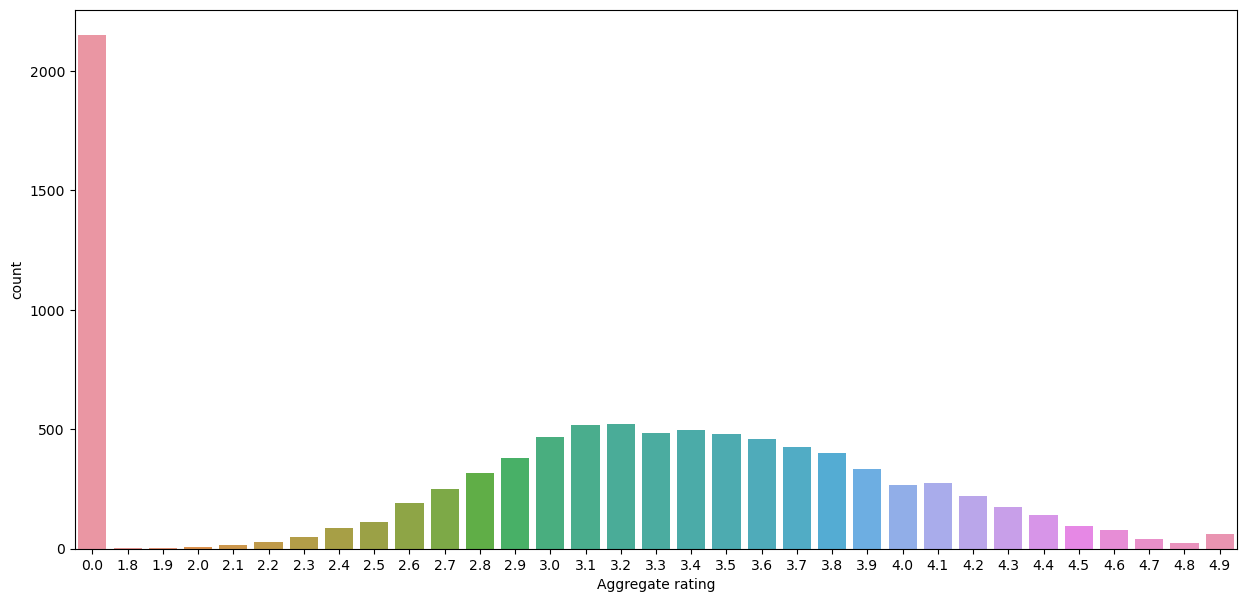

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='Aggregate rating',data=df1)

In [25]:
# most are rated between 3 to 3.5

<Axes: xlabel='Rating color', ylabel='count'>

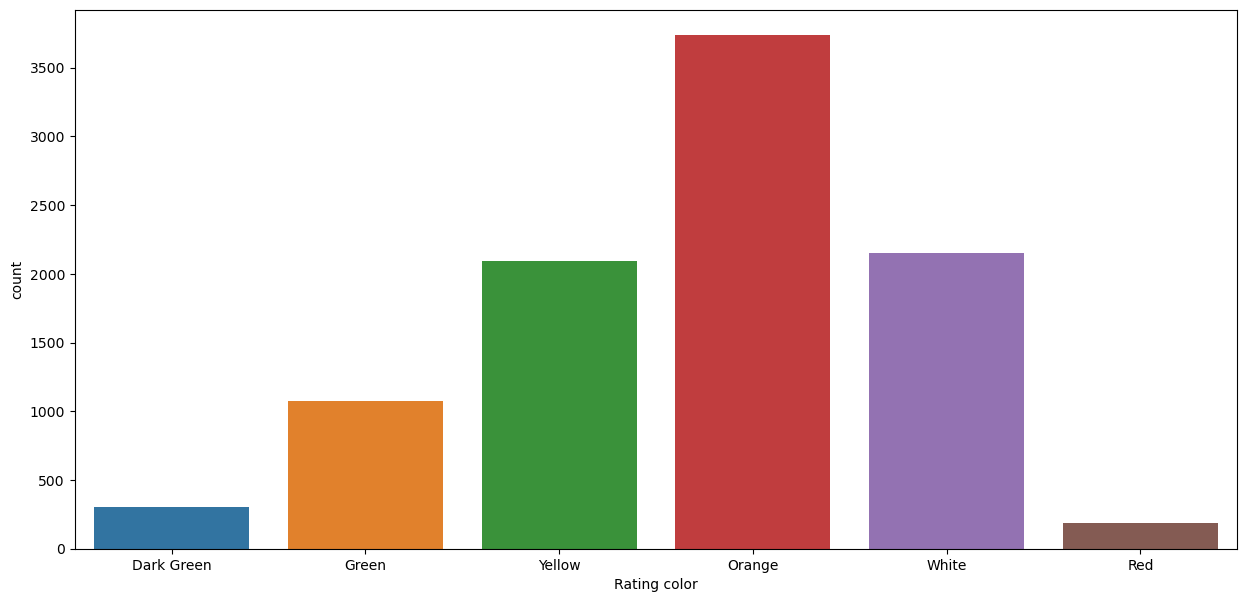

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x='Rating color',data=df1)

<Axes: xlabel='Average Cost for two', ylabel='count'>

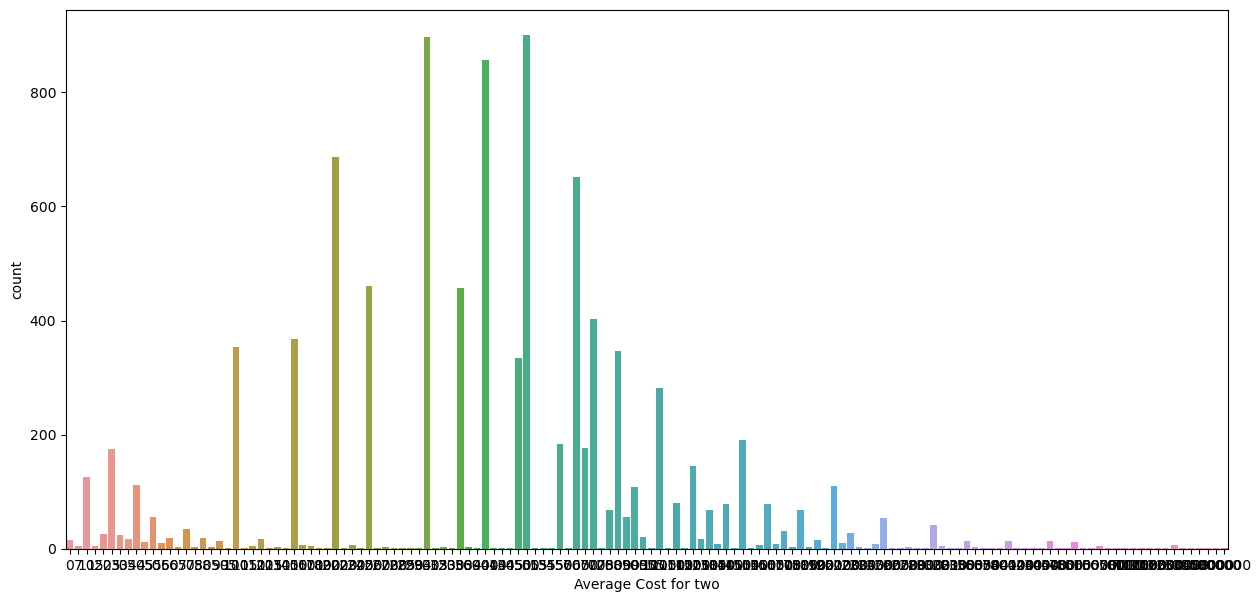

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='Average Cost for two',data=df1)

<Axes: xlabel='Price range', ylabel='count'>

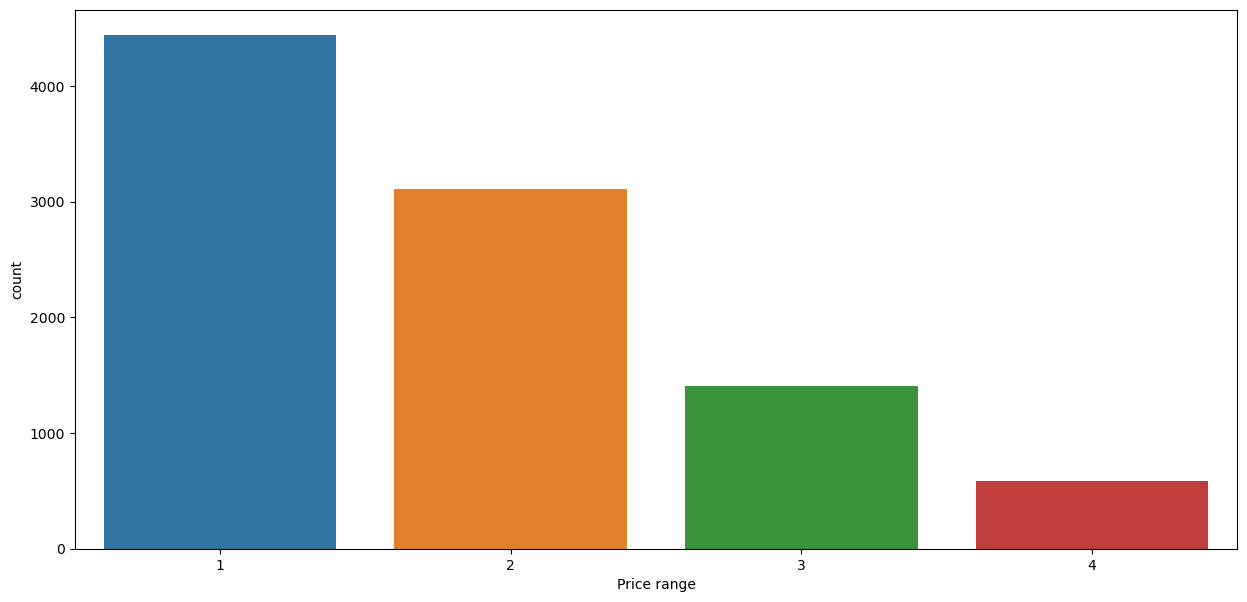

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x="Price range",data=df1)

<Axes: xlabel='Has Table booking', ylabel='count'>

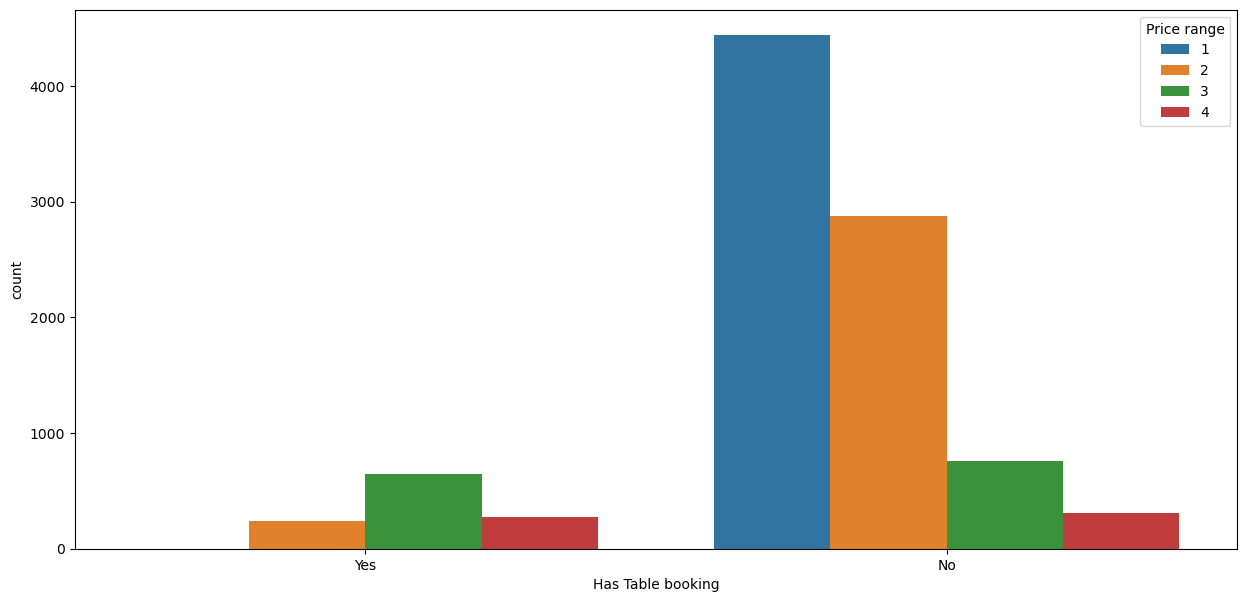

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(hue="Price range",x='Has Table booking',data=df1)

<Axes: xlabel='Has Online delivery', ylabel='count'>

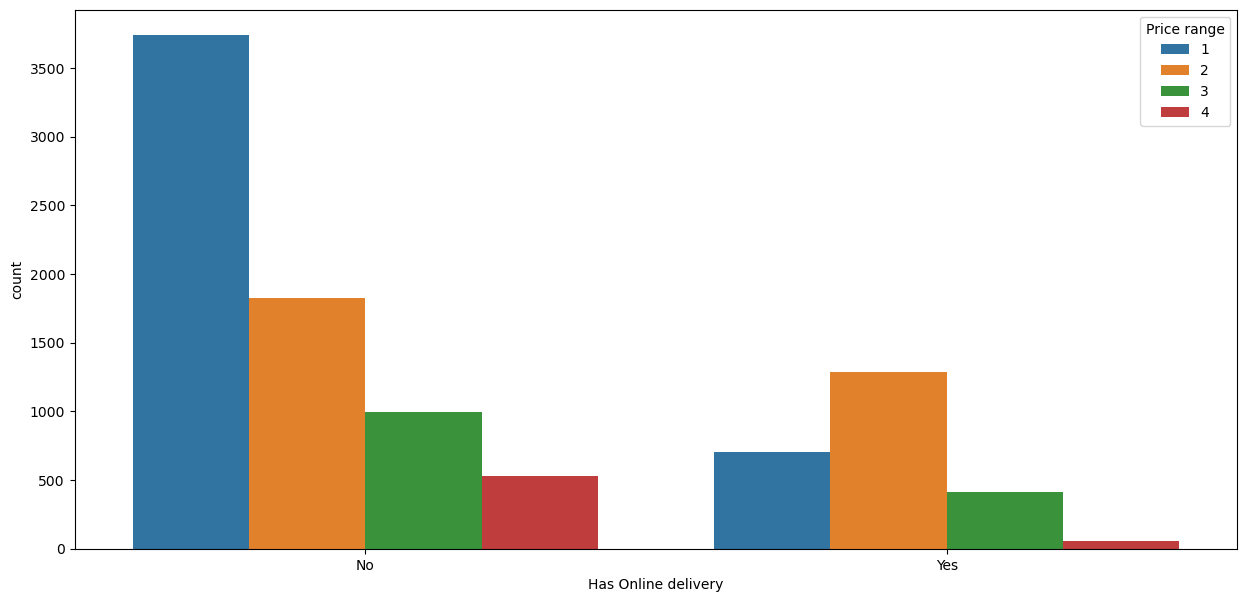

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(hue="Price range",x='Has Online delivery',data=df1)

<Axes: xlabel='Is delivering now', ylabel='count'>

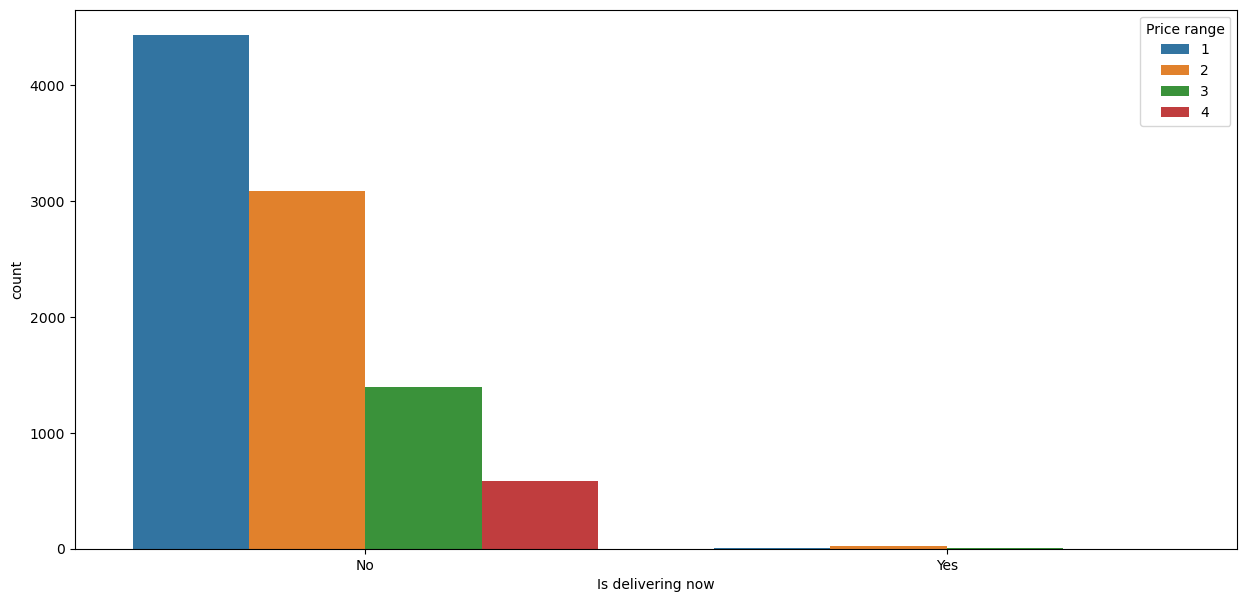

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(hue="Price range",x='Is delivering now',data=df1)

<Axes: xlabel='Rating color', ylabel='count'>

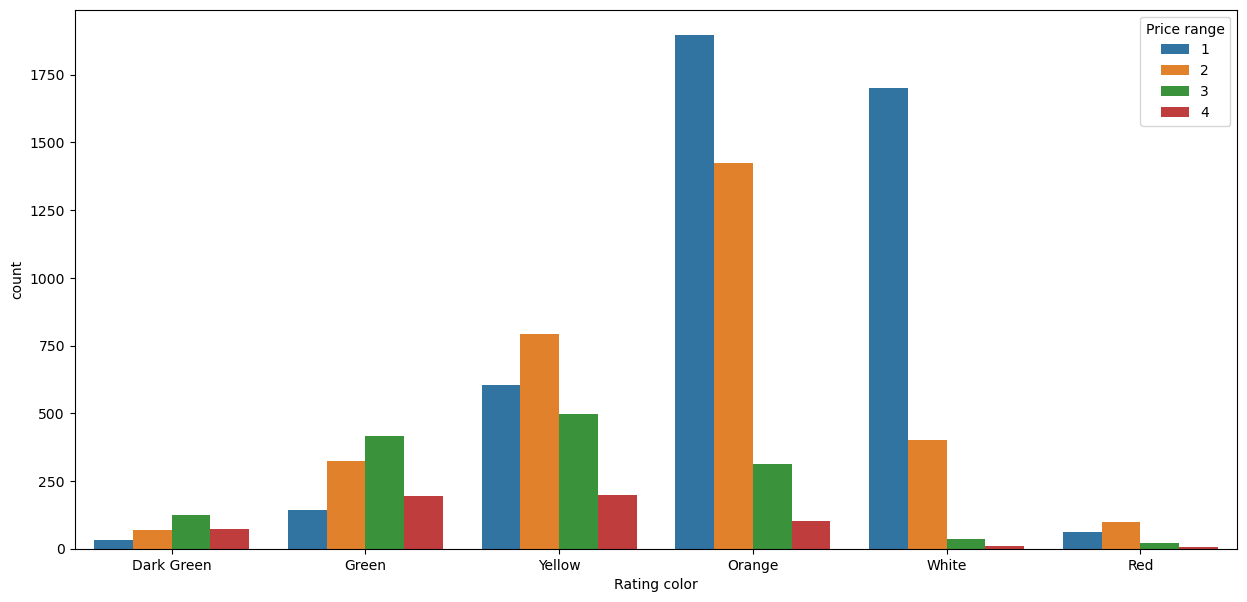

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(hue="Price range",x='Rating color',data=df1)

<Axes: xlabel='Rating text', ylabel='count'>

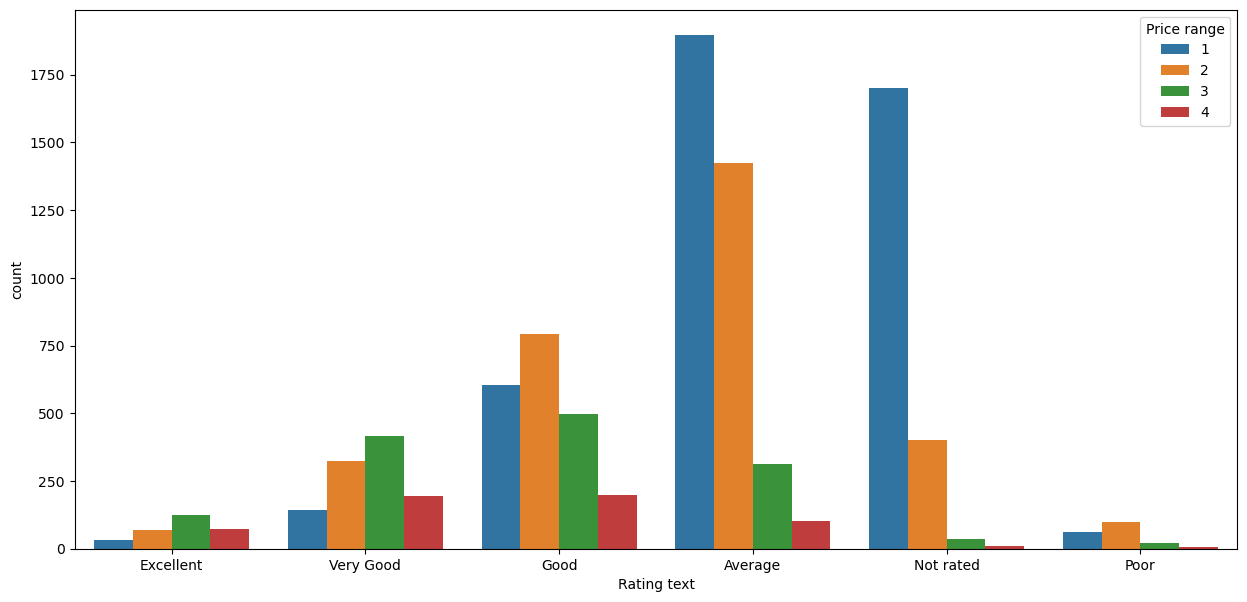

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(hue="Price range",x='Rating text',data=df1)

In [34]:
# Rating text an drating colour are the exact same thing so we are going to delete one of them
df1= df1.drop('Rating color',axis=1)

<Axes: ylabel='Price range'>

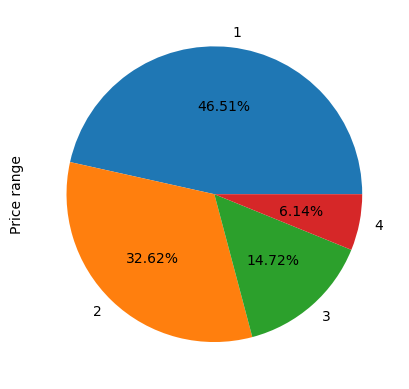

In [35]:
df1['Price range'].value_counts().plot.pie(autopct='%.2f%%')

In [36]:
import plotly.offline as py
import plotly.graph_objs as go
TYPES = df1.groupby('Price range')['Average Cost for two'].agg('sum')
values = [TYPES[1],TYPES[2],TYPES[3],TYPES[4]]
labels= [1,2,3,4]

graph = go.Pie(labels=labels,values=values)
py.iplot([graph])

In [37]:
categorical =df1[['Currency','Has Table booking',
       'Has Online delivery', 'Is delivering now']]

In [38]:
ohe=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
ohetransform = ohe.fit_transform(categorical)
df1 = pd.concat([df1,ohetransform],axis=1)
df1

Country Code              City  \
0              162       Makati City   
1              162       Makati City   
2              162  Mandaluyong City   
3              162  Mandaluyong City   
4              162  Mandaluyong City   
...            ...               ...   
9546           208         ÛÁstanbul   
9547           208         ÛÁstanbul   
9548           208         ÛÁstanbul   
9549           208         ÛÁstanbul   
9550           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776                              Cafe                    55   

              Currency  ... Currency_Indonesian Rupiah(IDR)  \
0     Botswana Pula(P)  ...                             0.0   
1     Botswana Pula(P)  ...                             0.0   
2     Botswana Pula(P)  ...                             0.0   
3     Botswana Pula(P)  ...                             0.0   
4     Botswana Pula(P)  ...                             0.0   
...                ...  ...                             ...

In [39]:
# 'Rating text' is ordinal
df1['Rating text'] = df1['Rating text'].map({'Excellent':6,'Very Good':5,'Good':4,'Average':3,'Poor':2,'Not rated':1})

In [40]:
df1 = df1.drop(['Currency','Has Table booking',
       'Has Online delivery', 'Is delivering now'],axis=1)
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [41]:
df1=df1.drop(['City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines'],axis=1)

In [42]:
df1['Country Code'] = pd.factorize(df1['Country Code'])[0]

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country Code                     9542 non-null   int64  
 1   Average Cost for two             9542 non-null   int64  
 2   Price range                      9542 non-null   int64  
 3   Aggregate rating                 9542 non-null   float64
 4   Rating text                      9542 non-null   int64  
 5   Votes                            9542 non-null   int64  
 6   Currency_Brazilian Real(R$)      9542 non-null   float64
 7   Currency_Dollar($)               9542 non-null   float64
 8   Currency_Emirati Diram(AED)      9542 non-null   float64
 9   Currency_Indian Rupees(Rs.)      9542 non-null   float64
 10  Currency_Indonesian Rupiah(IDR)  9542 non-null   float64
 11  Currency_NewZealand($)           9542 non-null   float64
 12  Currency_Pounds(£) 

In [47]:
important_info = df1.describe().T
important_info['variance'] = important_info['std']**2
important_info['co-variance'] = important_info['std']/important_info['mean']
important_info['skew'] = df1.skew().T
important_info

count         mean           std  min  \
Country Code                     9542.0     6.814714      1.418669  0.0   
Average Cost for two             9542.0  1200.326137  16128.743876  0.0   
Price range                      9542.0     1.804968      0.905563  1.0   
Aggregate rating                 9542.0     2.665238      1.516588  0.0   
Rating text                      9542.0     3.070216      1.367375  1.0   
Votes                            9542.0   156.772060    430.203324  0.0   
Currency_Brazilian Real(R$)      9542.0     0.006288      0.079051  0.0   
Currency_Dollar($)               9542.0     0.049570      0.217067  0.0   
Currency_Emirati Diram(AED)      9542.0     0.006288      0.079051  0.0   
Currency_Indian Rupees(Rs.)      9542.0     0.906728      0.290828  0.0   
Currency_Indonesian Rupiah(IDR)  9542.0     0.002201      0.046863  0.0   
Currency_NewZealand($)           9542.0     0.004192      0.064613  0.0   
Currency_Pounds(£)              9542.0     0.008384      0.091184  0.0   
Currency_Qatari Rial(QR)         9542.0     0.002096      0.045736  0.0   
Currency_Rand(R)                 9542.0     0.006288      0.079051  0.0   
Currency_Sri Lankan Rupee(LKR)   9542.0     0.002096      0.045736  0.0   
Currency_Turkish Lira(TL)        9542.0     0.003563      0.059589  0.0   
Has Table booking_Yes            9542.0     0.121358      0.326560  0.0   
Has Online delivery_Yes          9542.0     0.256864      0.436927  0.0   
Is delivering now_Yes            9542.0     0.003563      0.059589  0.0   

                                   25%    50%    75%       max      variance  \
Country Code                       7.0    7.0    7.0      14.0  2.012621e+00   
Average Cost for two             250.0  400.0  700.0  800000.0  2.601364e+08   
Price range                        1.0    2.0    2.0       4.0  8.200445e-01   
Aggregate rating                   2.5    3.2    3.7       4.9  2.300038e+00   
Rating text                        3.0    3.0    4.0       6.0  1.869715e+00   
Votes                              5.0   31.0  130.0   10934.0  1.850749e+05   
Currency_Brazilian Real(R$)        0.0    0.0    0.0       1.0  6.249106e-03   
Currency_Dollar($)                 0.0    0.0    0.0       1.0  4.711804e-02   
Currency_Emirati Diram(AED)        0.0    0.0    0.0       1.0  6.249106e-03   
Currency_Indian Rupees(Rs.)        1.0    1.0    1.0       1.0  8.458108e-02   
Currency_Indonesian Rupiah(IDR)    0.0    0.0    0.0       1.0  2.196183e-03   
Currency_NewZealand($)             0.0    0.0    0.0       1.0  4.174858e-03   
Currency_Pounds(£)                0.0    0.0    0.0       1.0  8.314567e-03   
Currency_Qatari Rial(QR)           0.0    0.0    0.0       1.0  2.091823e-03   
Currency_Rand(R)                   0.0    0.0    0.0       1.0  6.249106e-03   
Currency_Sri Lankan Rupee(LKR)     0.0    0.0    0.0       1.0  2.091823e-03   
Currency_Turkish Lira(TL)          0.0    0.0    0.0       1.0  3.550870e-03   
Has Table booking_Yes              0.0    0.0    0.0       1.0  1.066416e-01   
Has Online delivery_Yes            0.0    0.0    1.0       1.0  1.909051e-01   
Is delivering now_Yes              0.0    0.0    0.0       1.0  3.550870e-03   

                                 co-variance       skew  
Country Code                        0.208177  -1.376754  
Average Cost for two               13.436968  35.461264  
Price range                         0.501706   0.889879  
Aggregate rating                    0.569025  -0.953052  
Rating text                         0.445368  -0.094763  
Votes                               2.744133   8.813270  
Currency_Brazilian Real(R$)        12.571790  12.493548  
Currency_Dollar($)                  4.378969   4.151016  
Currency_Emirati Diram(AED)        12.571790  12.493548  
Currency_Indian Rupees(Rs.)         0.320745  -2.797620  
Currency_Indonesian Rupiah(IDR)    21.293860  21.249120  
Currency_NewZealand($)             15.413465  15.350189  
Currency_Pounds(£)    

In [38]:
df1.skew()

Country Code                       -1.376754
Average Cost for two               35.461264
Price range                         0.889879
Aggregate rating                   -0.953052
Rating text                        -0.094763
Votes                               8.813270
Currency_Brazilian Real(R$)        12.493548
Currency_Dollar($)                  4.151016
Currency_Emirati Diram(AED)        12.493548
Currency_Indian Rupees(Rs.)        -2.797620
Currency_Indonesian Rupiah(IDR)    21.249120
Currency_NewZealand($)             15.350189
Currency_Pounds(£)                10.785176
Currency_Qatari Rial(QR)           21.777309
Currency_Rand(R)                   12.493548
Currency_Sri Lankan Rupee(LKR)     21.777309
Currency_Turkish Lira(TL)          16.665472
Has Table booking_Yes               2.319457
Has Online delivery_Yes             1.113168
Is delivering now_Yes              16.665472
dtype: float64

Country Code
-1.3765375270701945


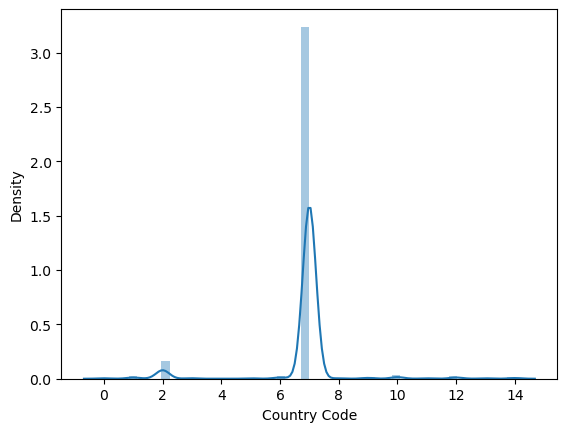

Average Cost for two
35.455688782841825


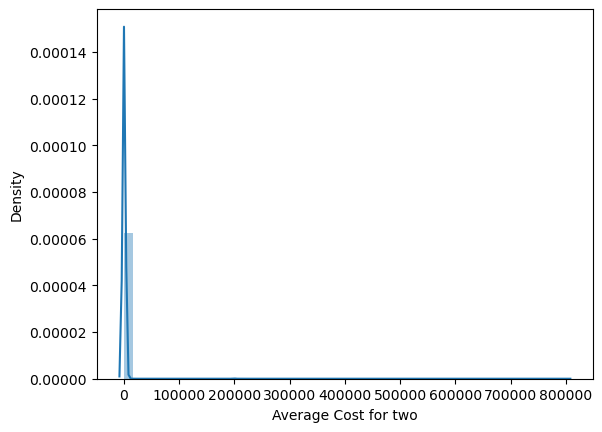

Price range
0.8897388085906884


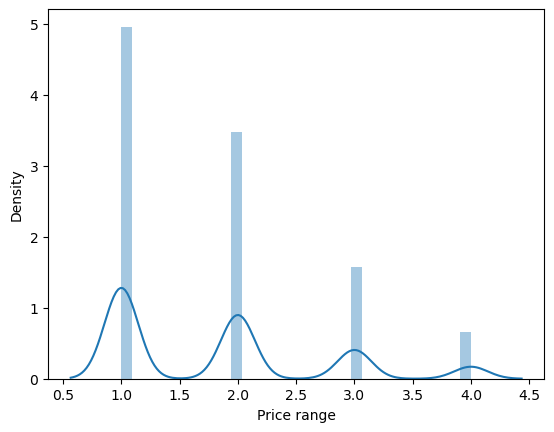

Aggregate rating
-0.9529023128493461


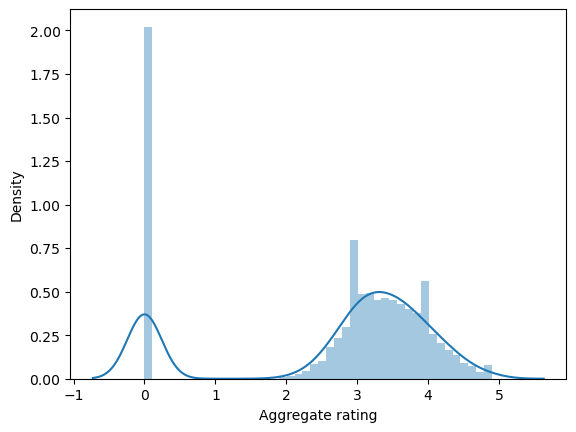

Rating text
-0.0947485511614379


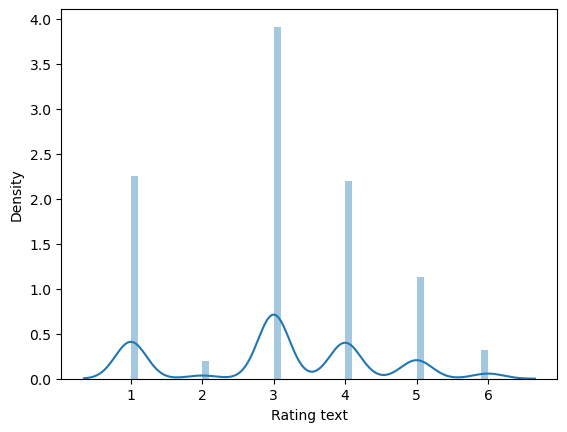

Votes
8.811884592858666


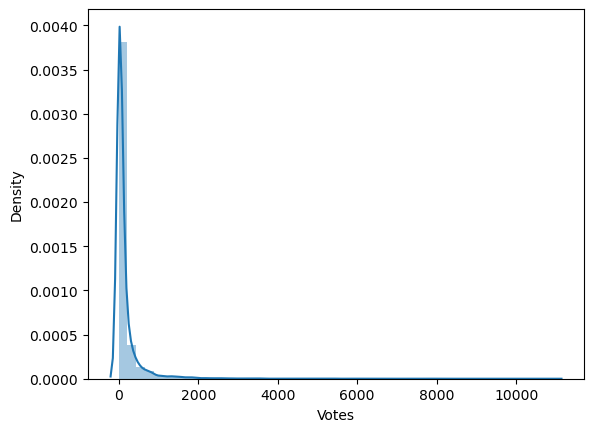

Currency_Brazilian Real(R$)
12.491583611067202


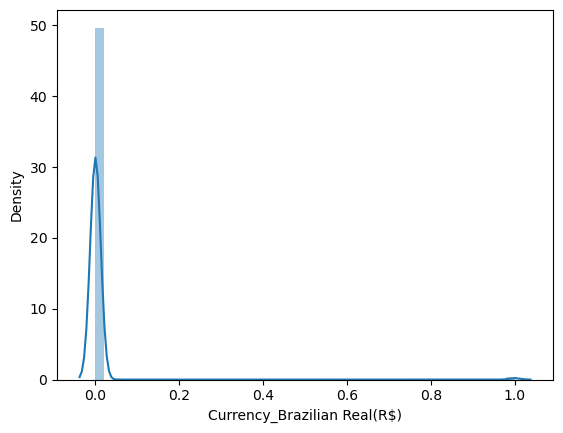

Currency_Dollar($)
4.150363504251672


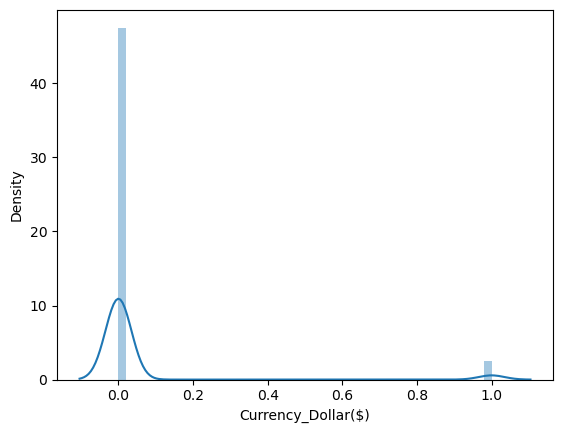

Currency_Emirati Diram(AED)
12.491583611067206


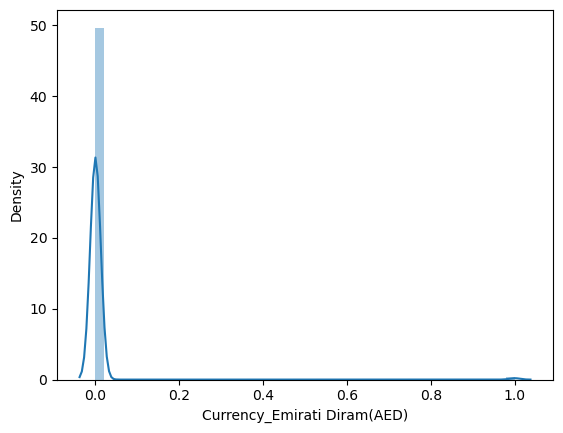

Currency_Indian Rupees(Rs.)
-2.797179776825384


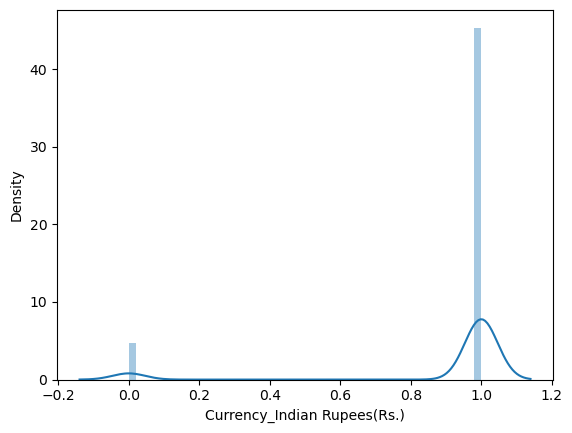

Currency_Indonesian Rupiah(IDR)
21.245779769912414


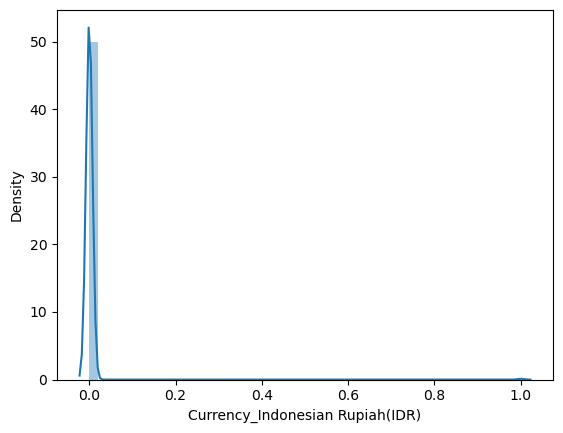

Currency_NewZealand($)
15.347775397108053


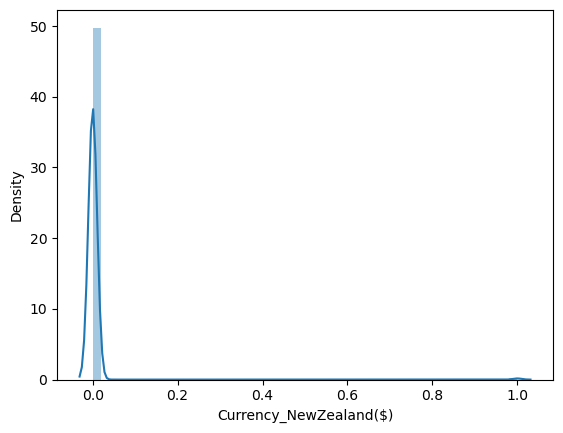

Currency_Pounds(£)
10.783480647366144


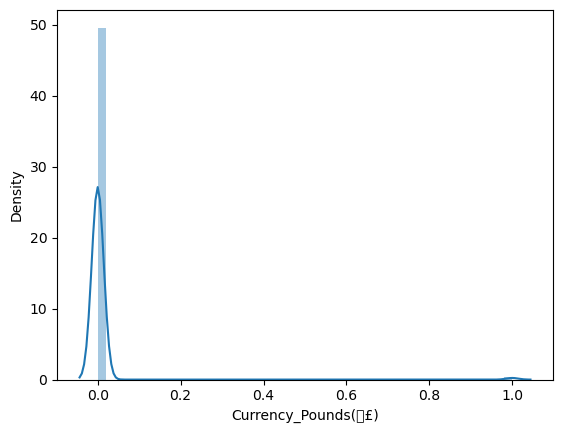

Currency_Qatari Rial(QR)
21.77388574414488


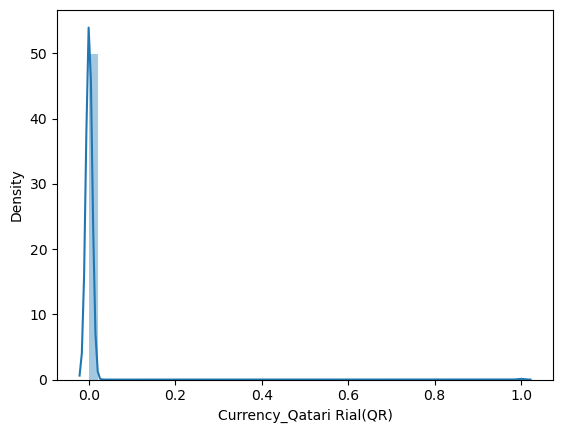

Currency_Rand(R)
12.491583611067208


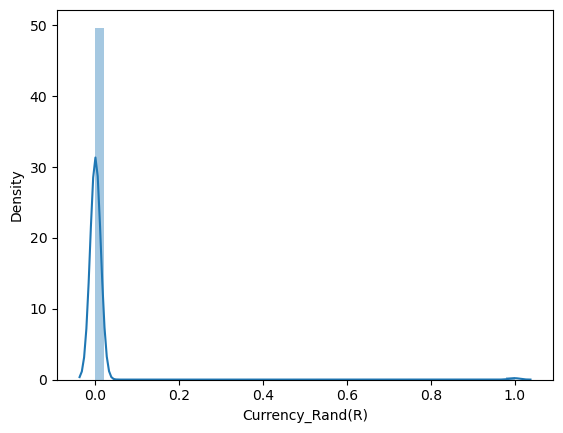

Currency_Sri Lankan Rupee(LKR)
21.77388574414489


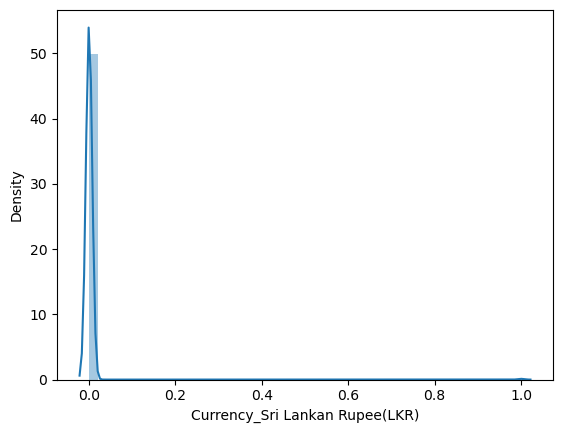

Currency_Turkish Lira(TL)
16.662851939556553


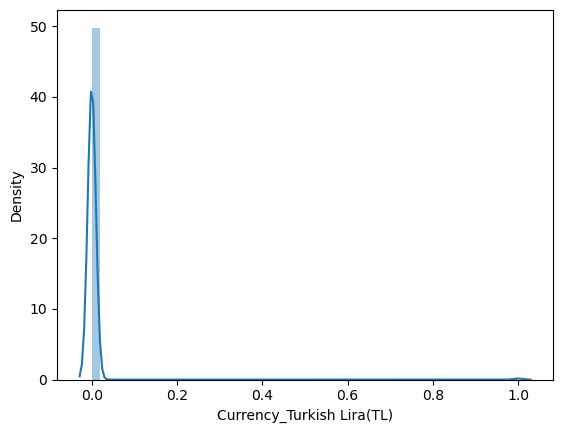

Has Table booking_Yes
2.3190923469401357


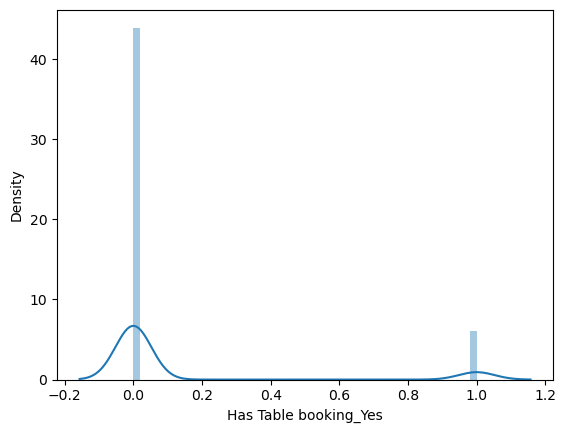

Has Online delivery_Yes
1.1129933826902352


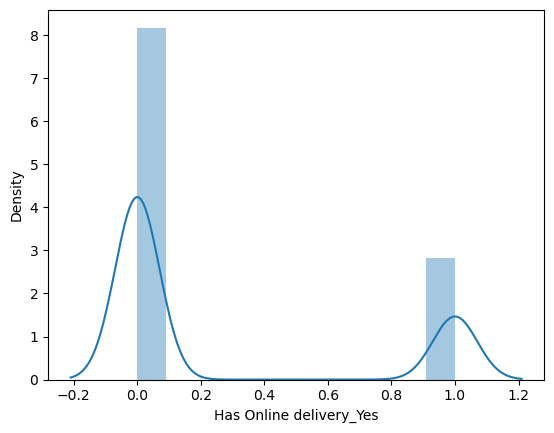

Is delivering now_Yes
16.662851939556546


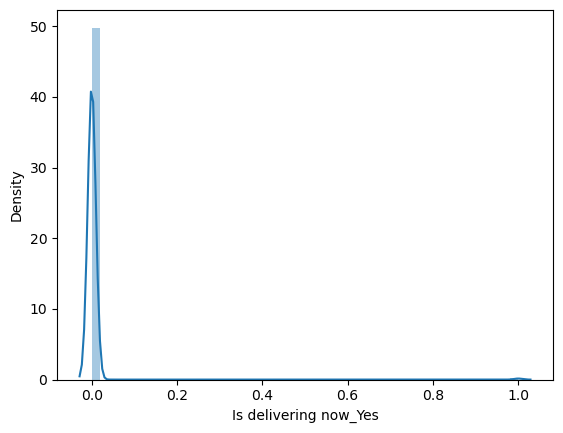

In [39]:
from scipy.stats import skew
for col in df1:
    print(col)
    print(skew(df1[col]))
    
    plt.figure()
    sns.distplot(df1[col])
    plt.show()

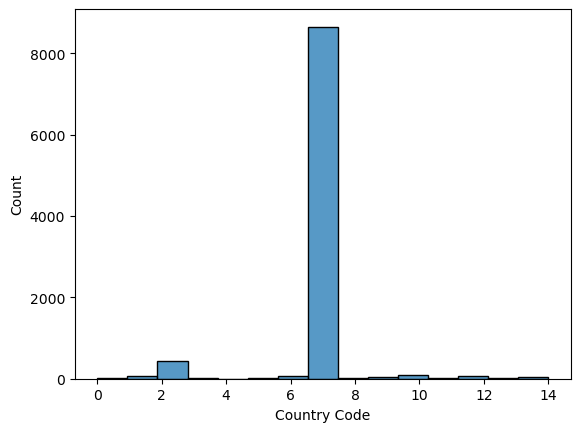

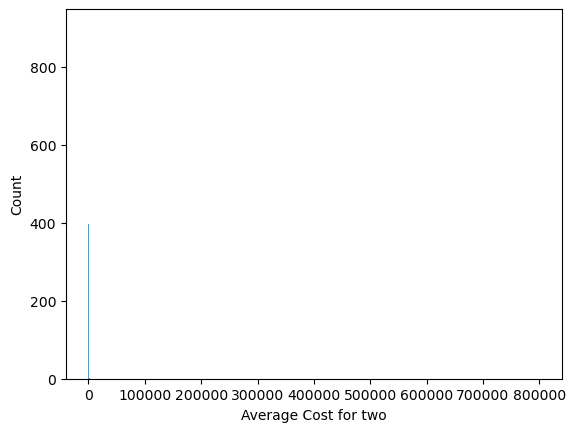

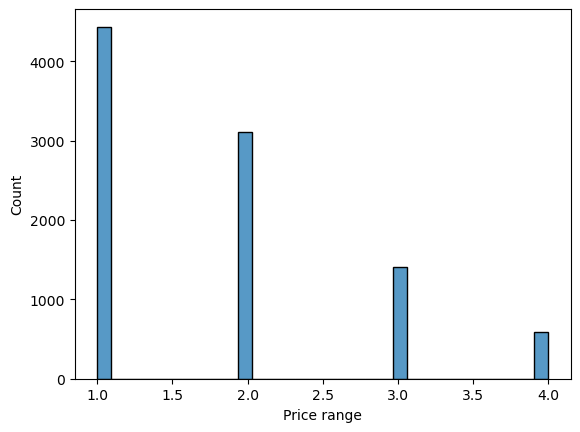

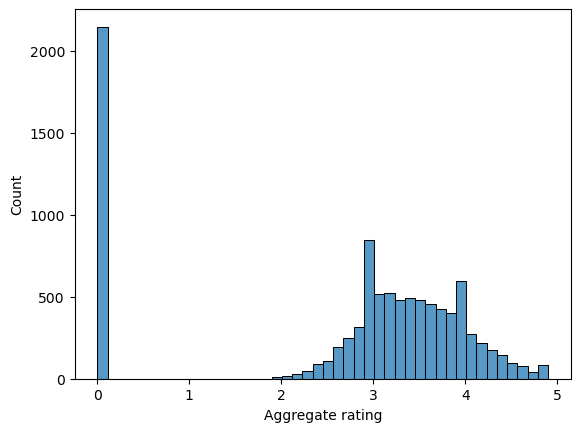

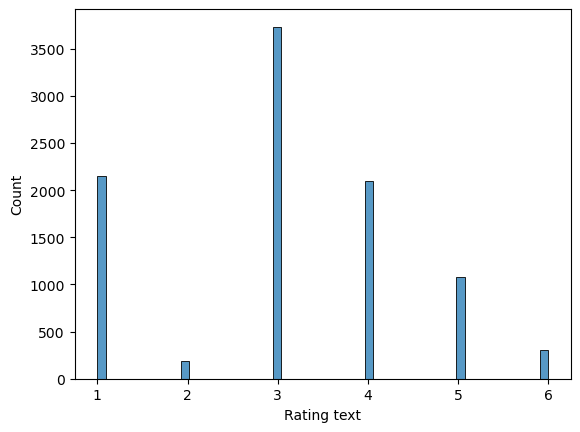

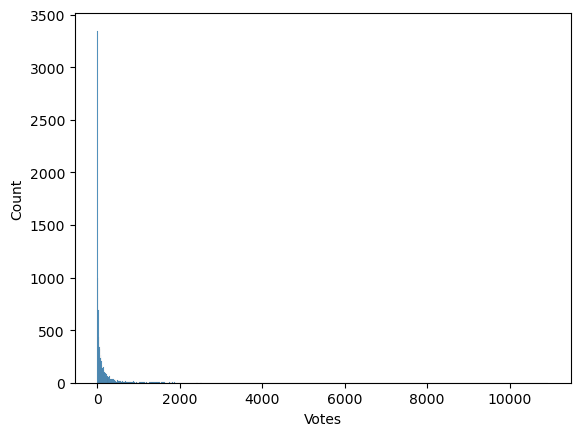

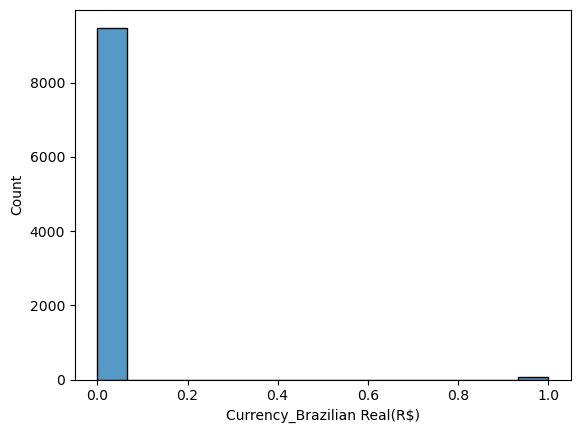

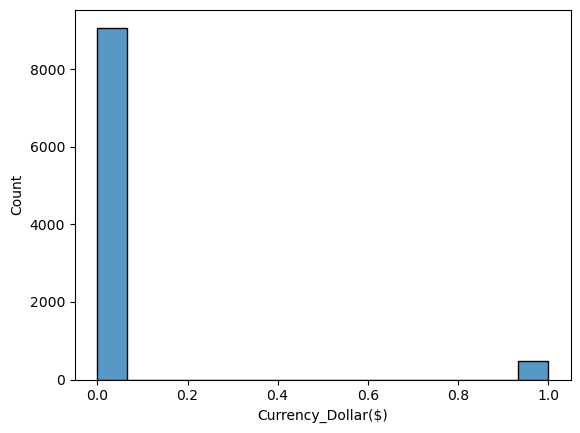

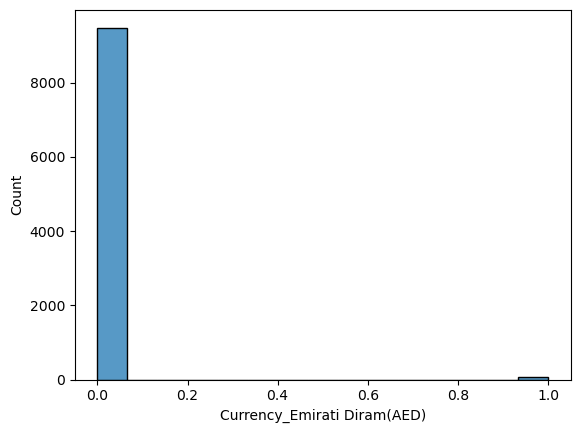

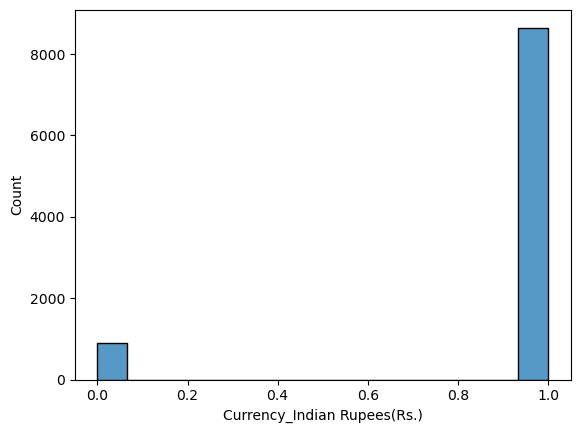

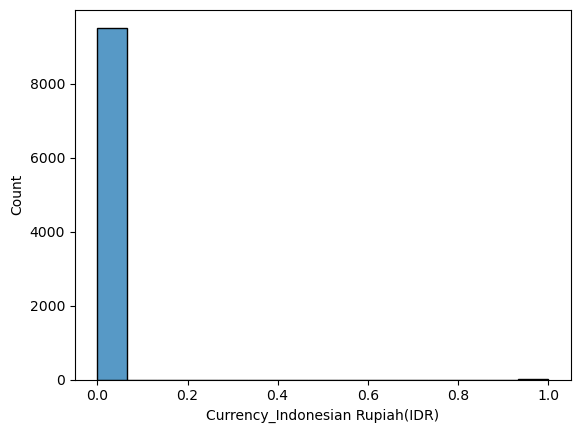

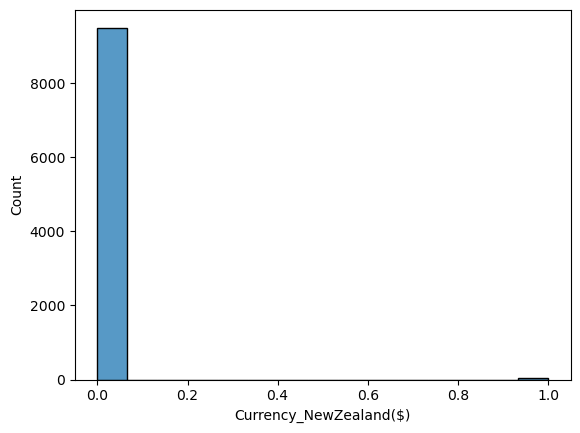

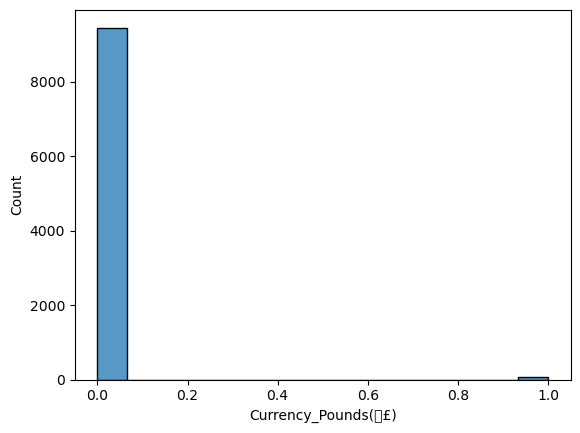

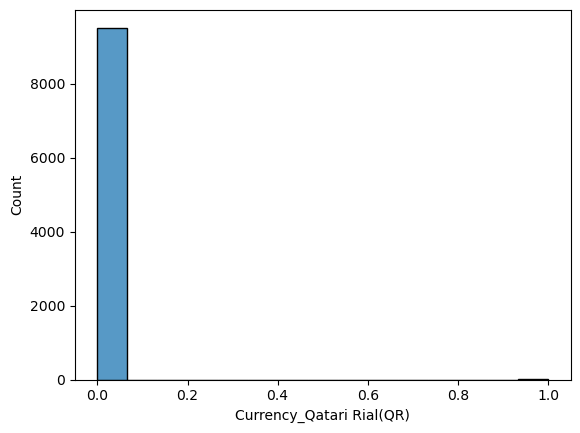

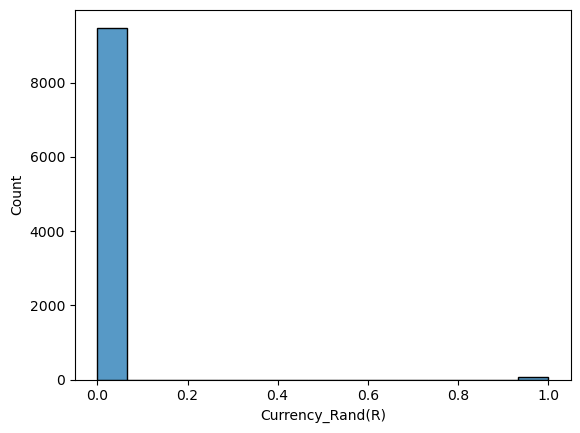

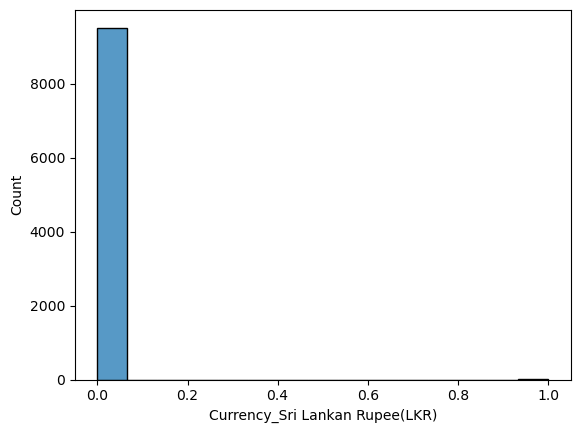

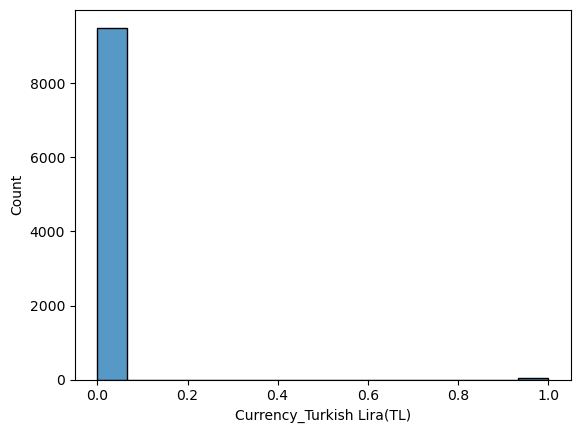

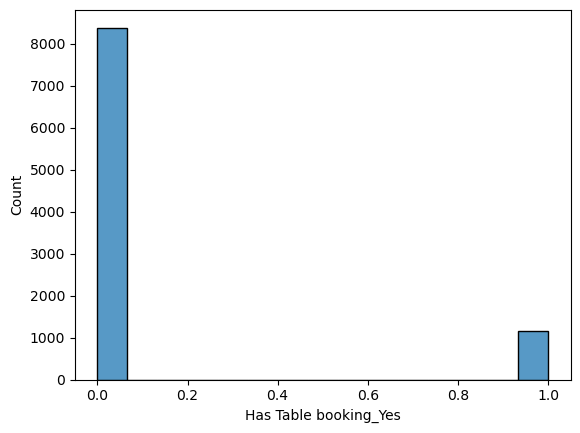

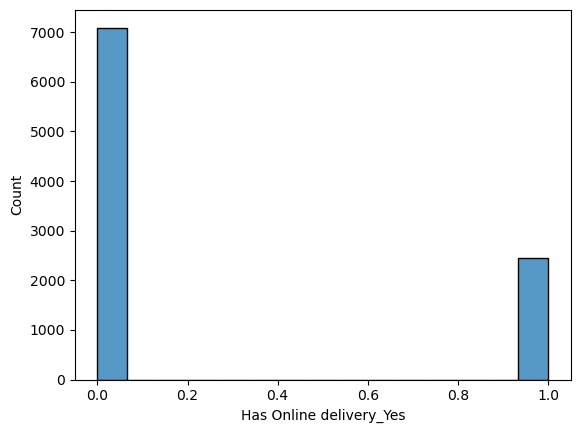

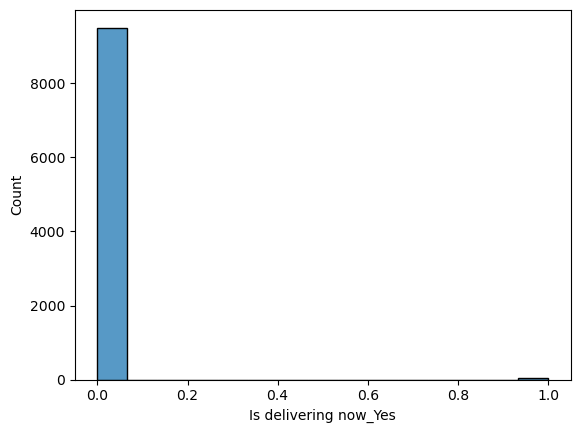

In [49]:
for i in df1.columns:
    sns.histplot(data=df1,x=i)
    plt.show()

<Axes: >

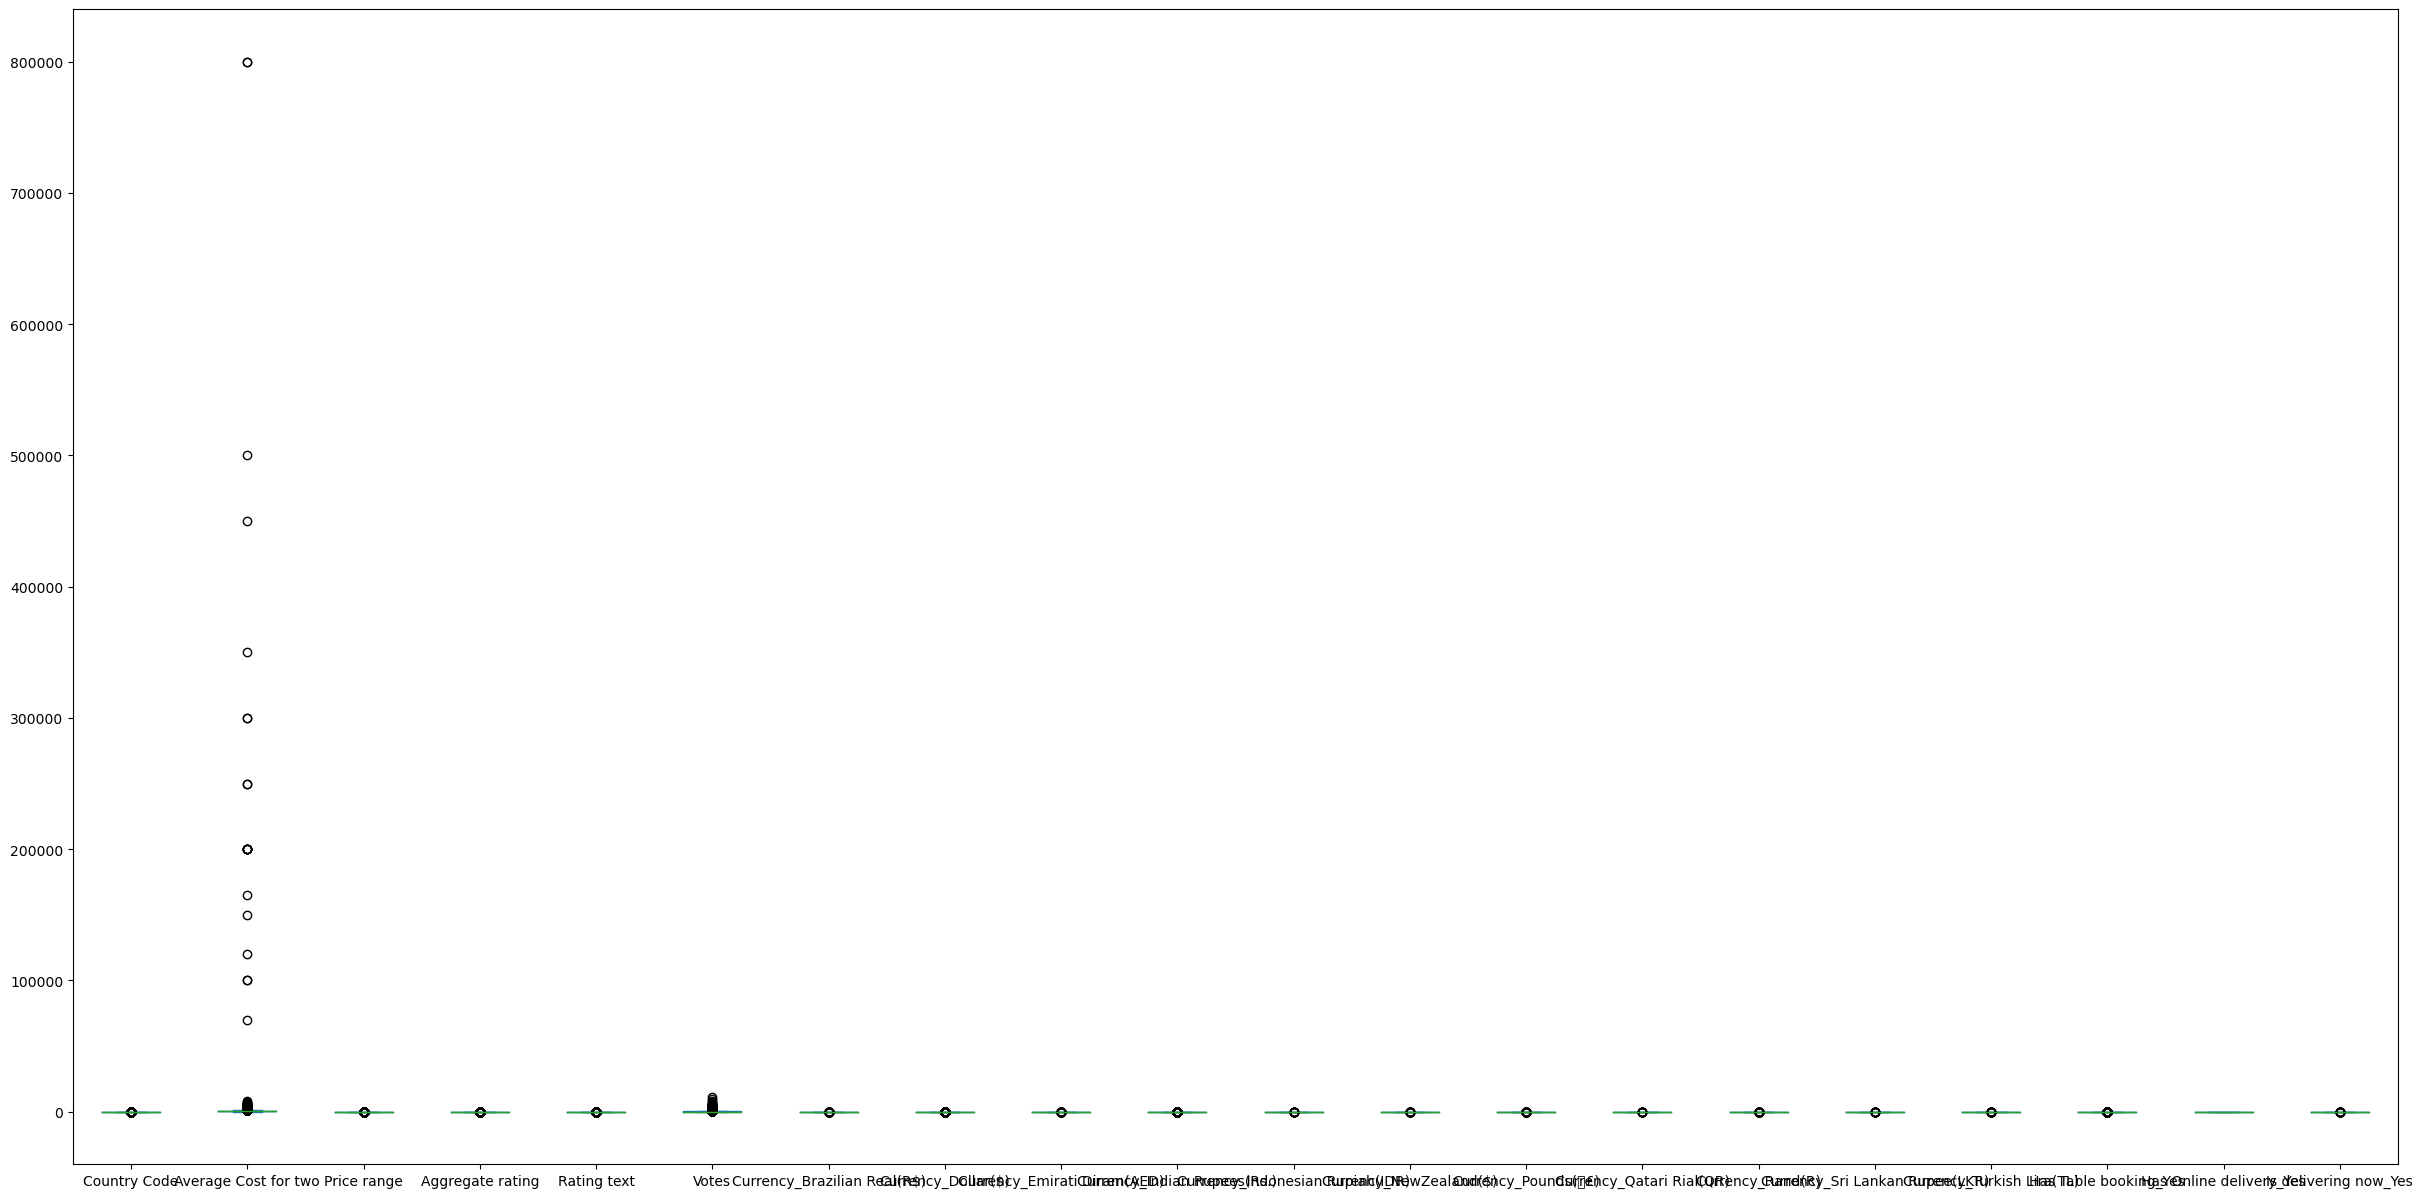

In [40]:
df1.plot(kind='box',figsize=(30,15))

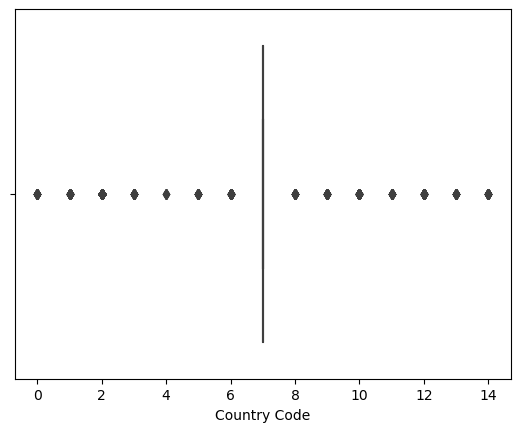

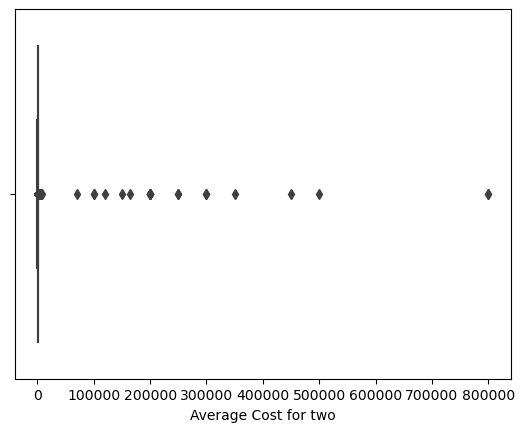

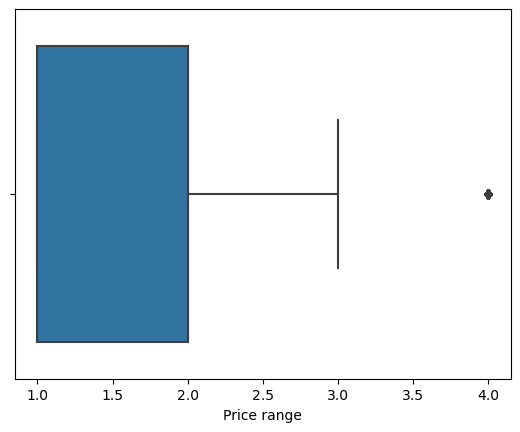

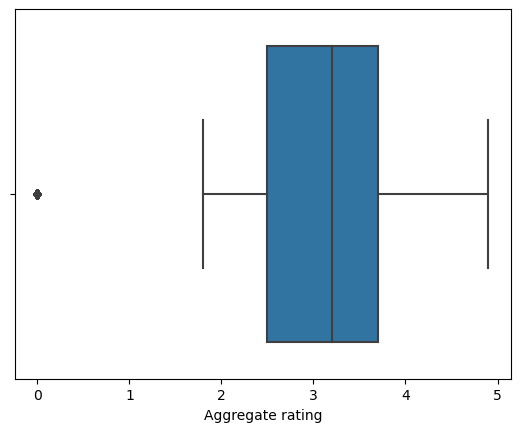

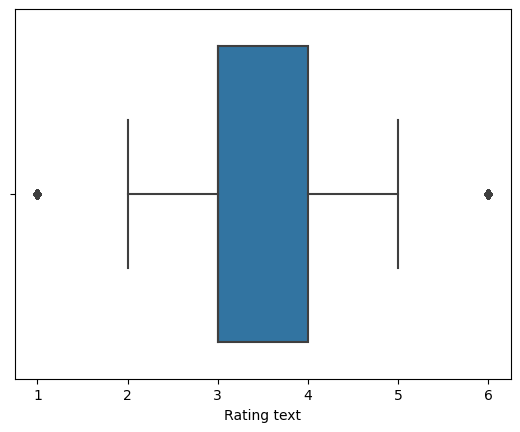

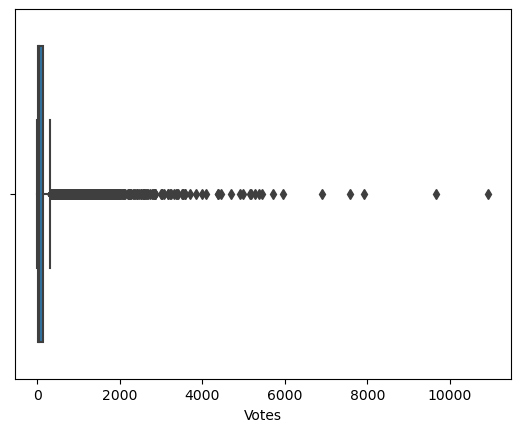

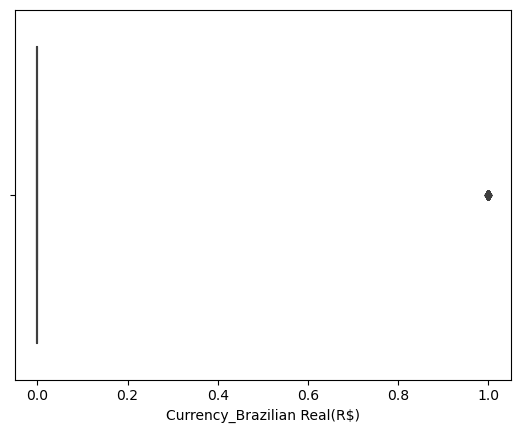

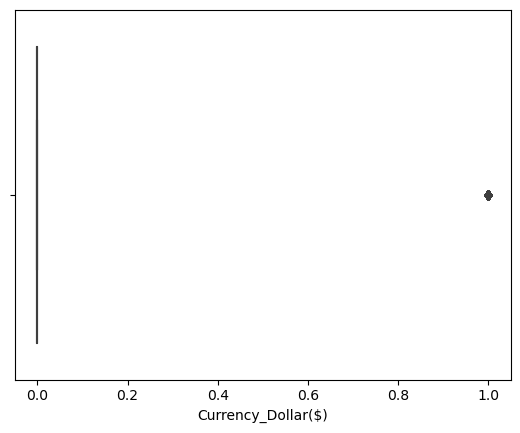

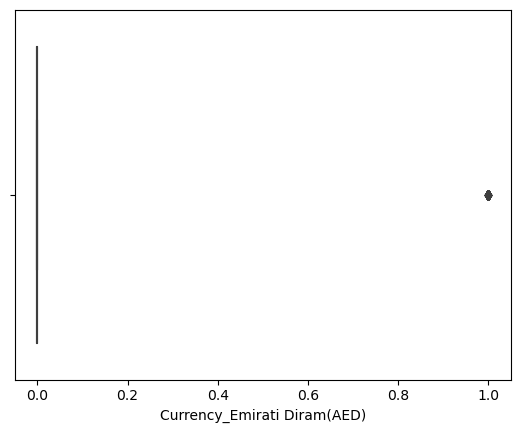

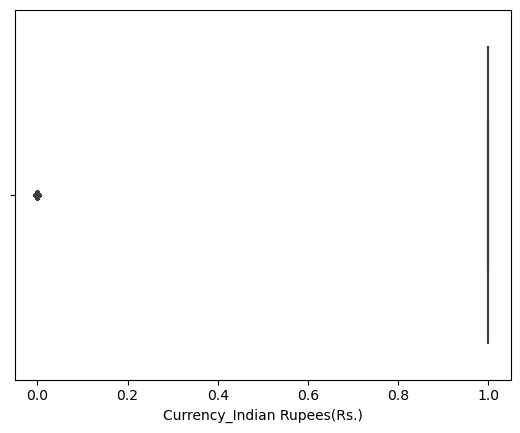

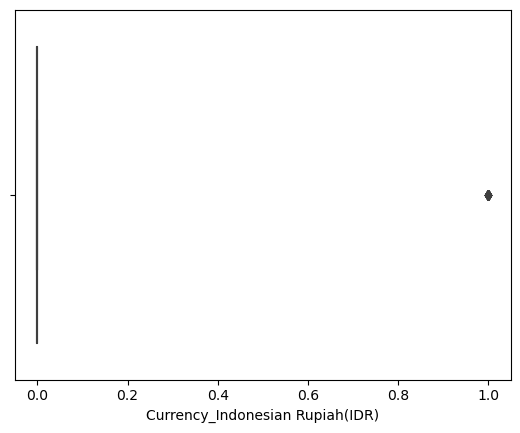

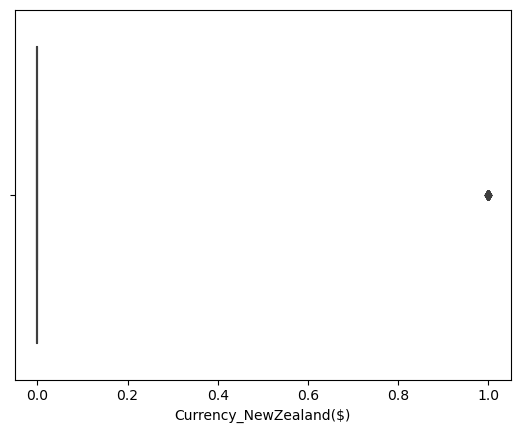

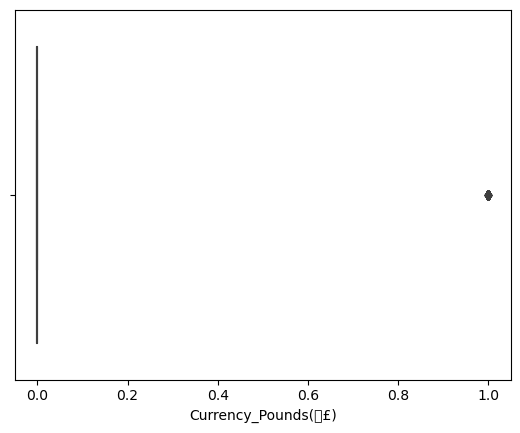

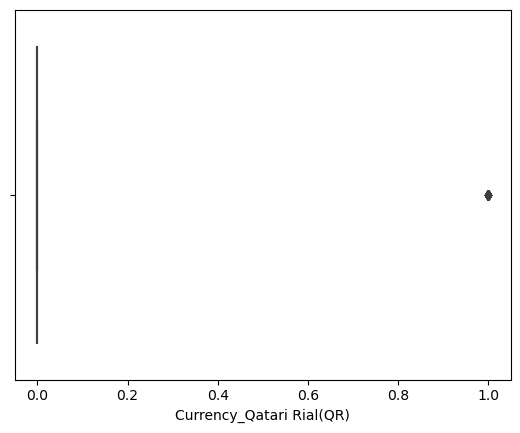

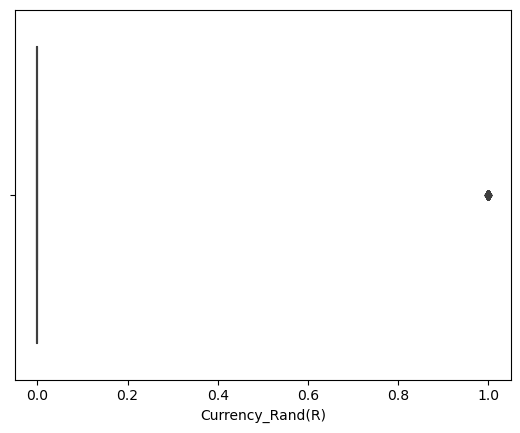

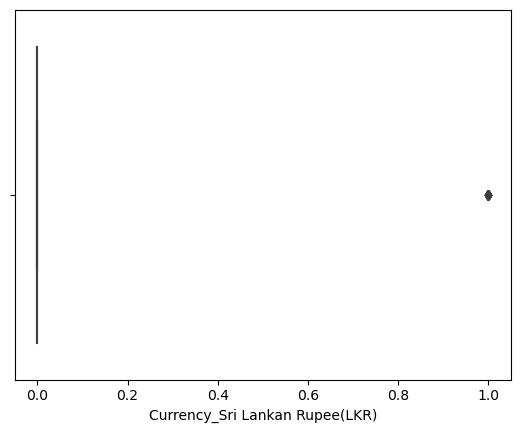

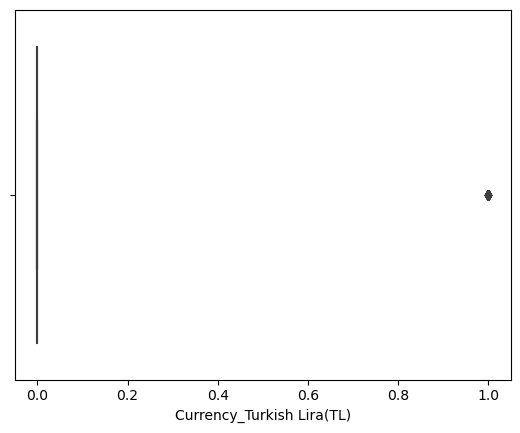

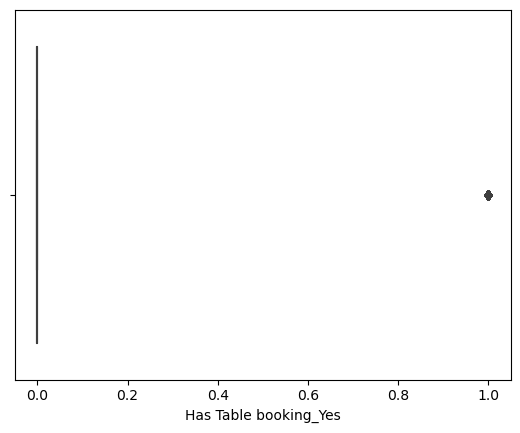

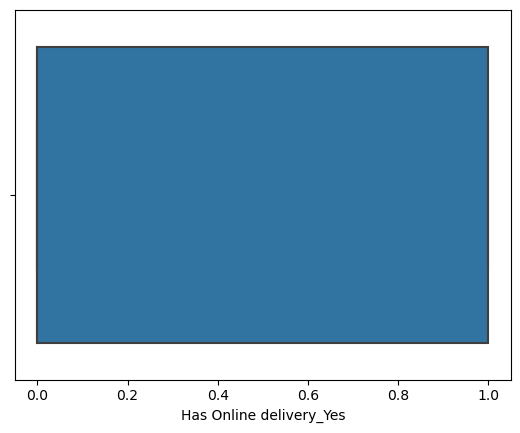

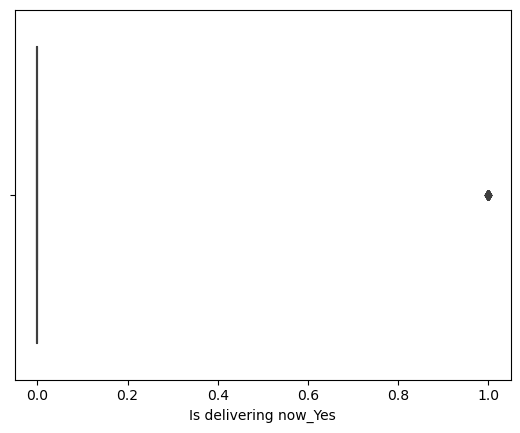

In [50]:
for i in df1.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

<Axes: >

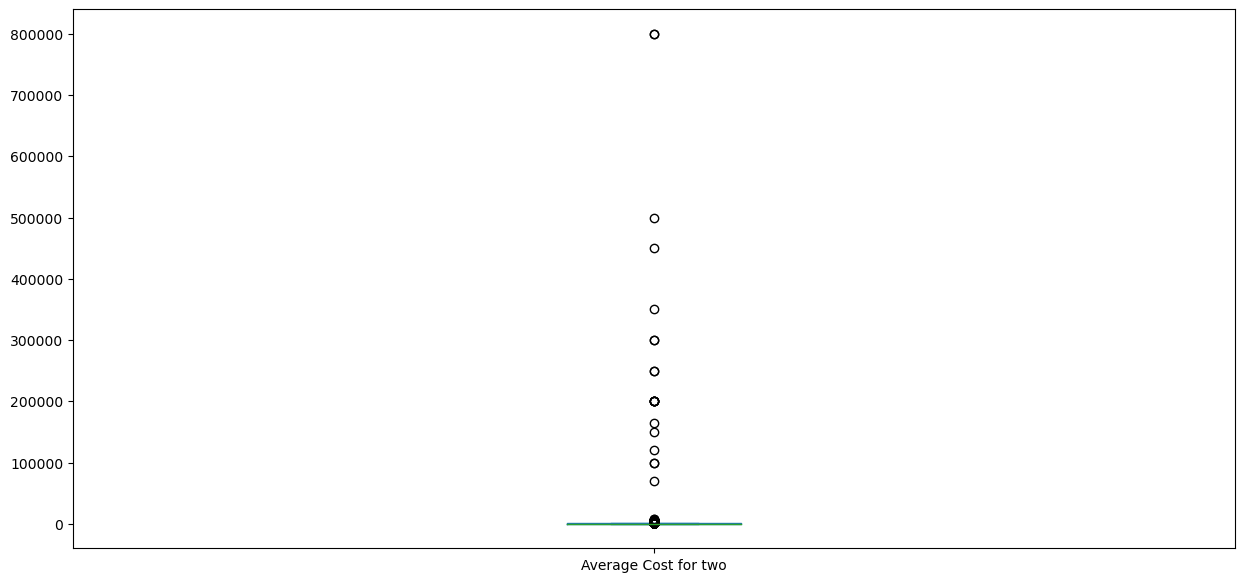

In [41]:
df1['Average Cost for two'].plot(kind='box',figsize=(15,7))

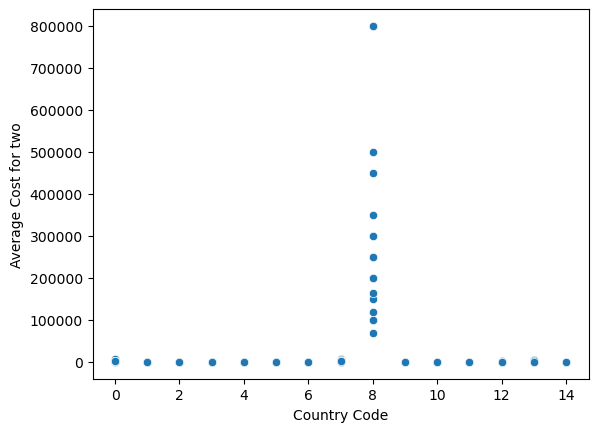

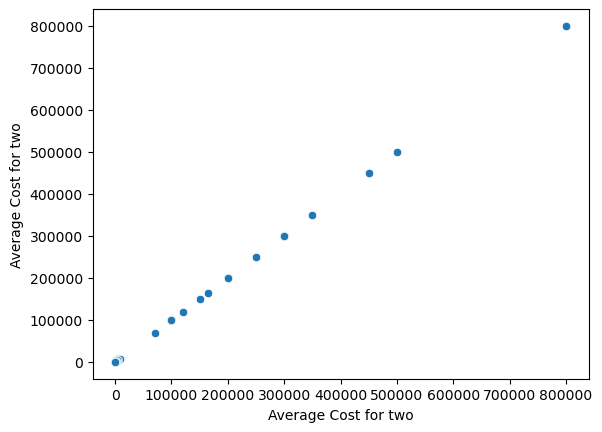

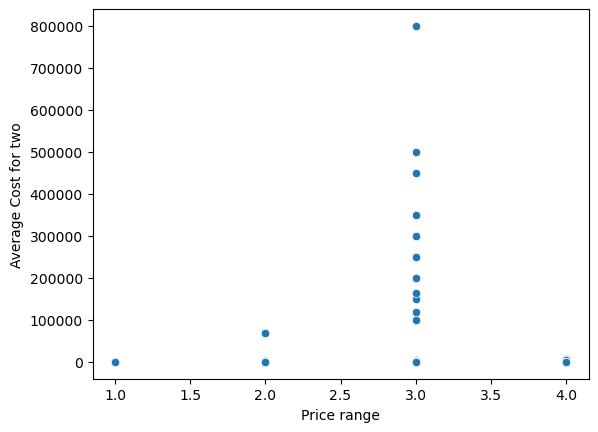

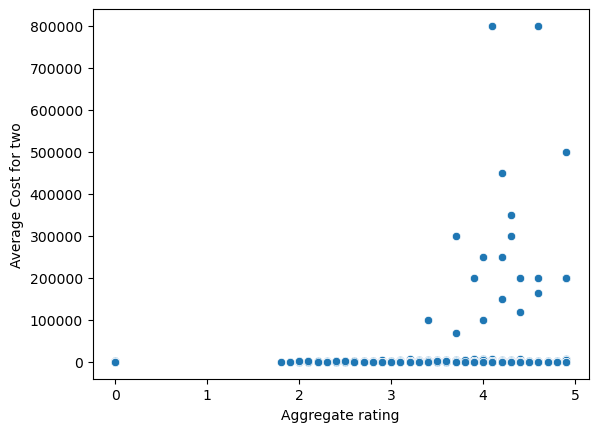

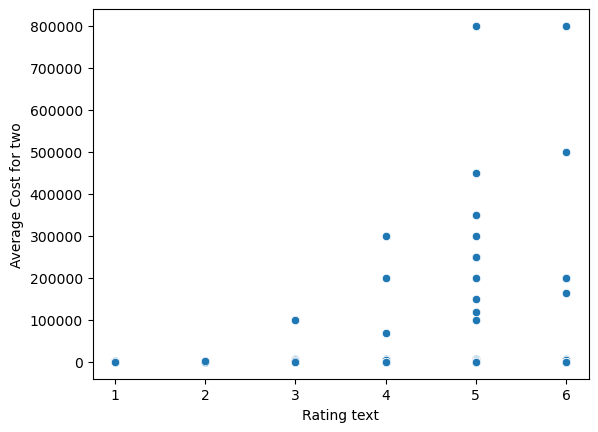

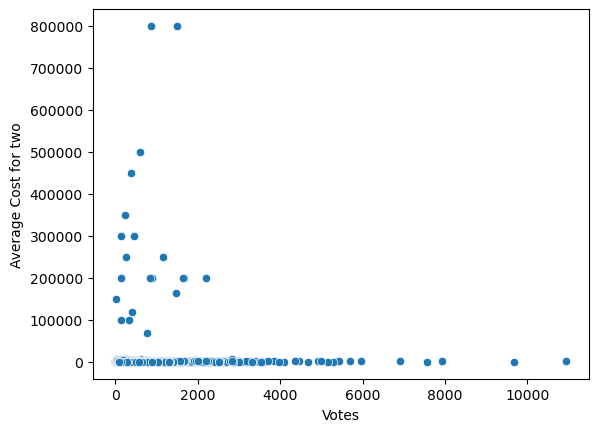

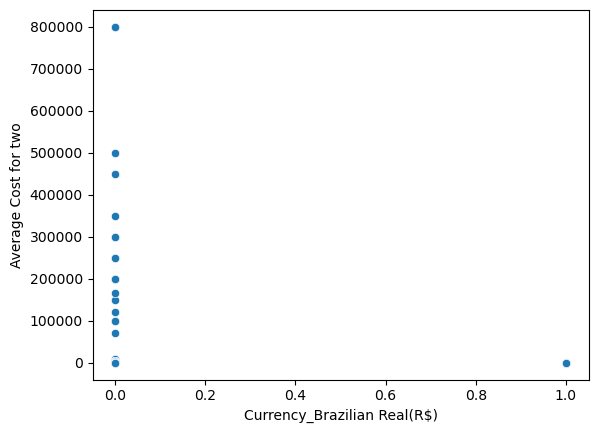

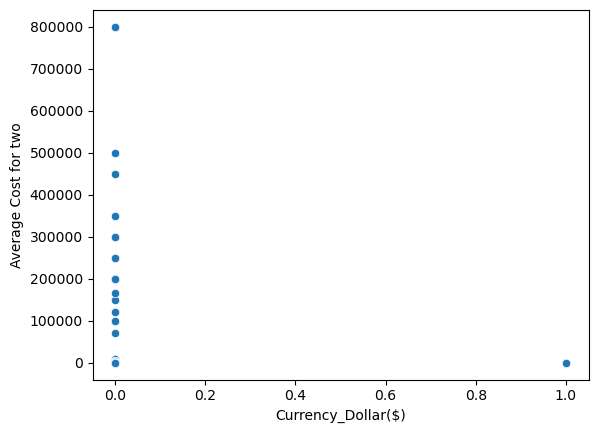

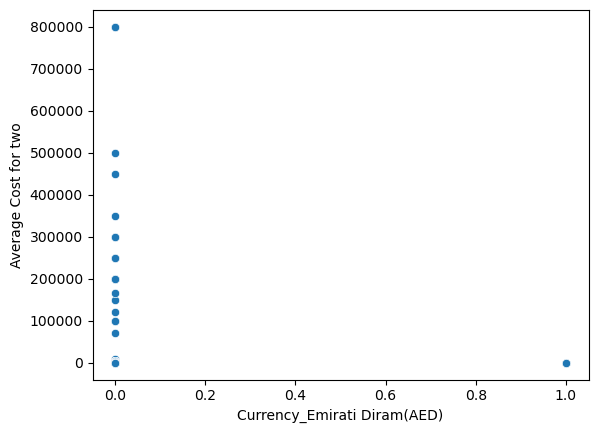

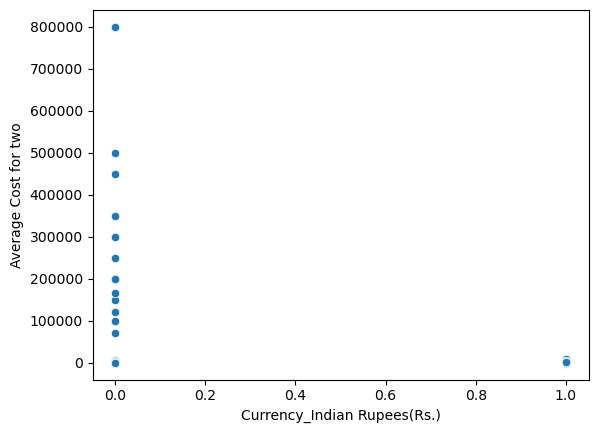

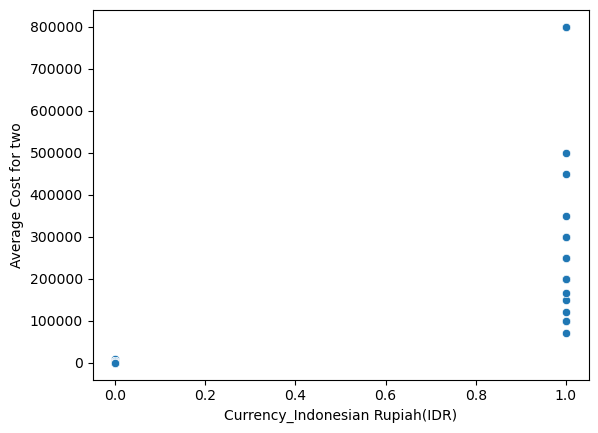

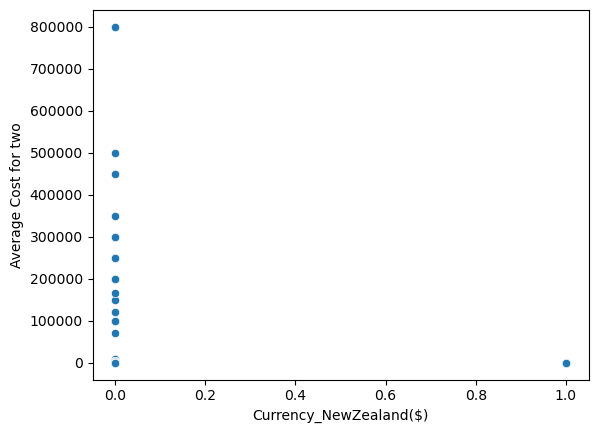

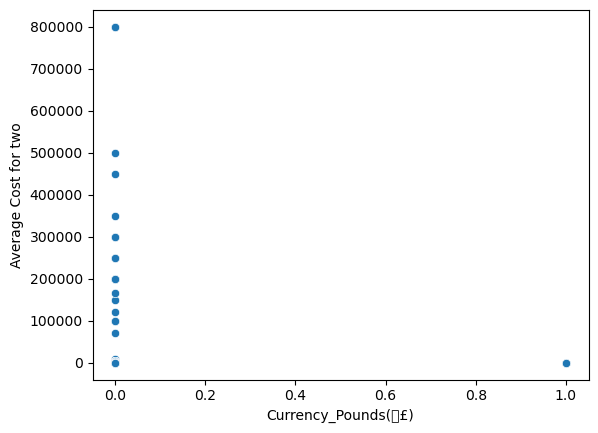

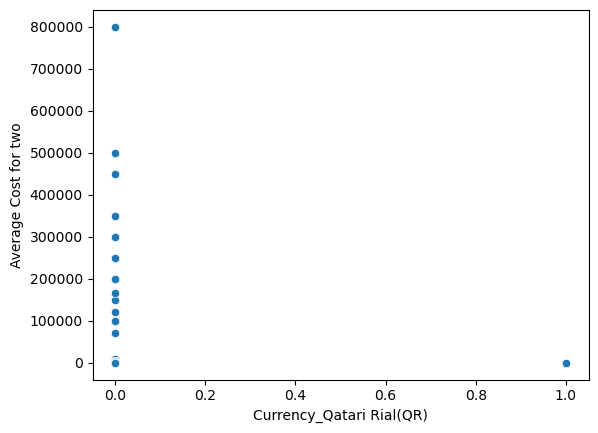

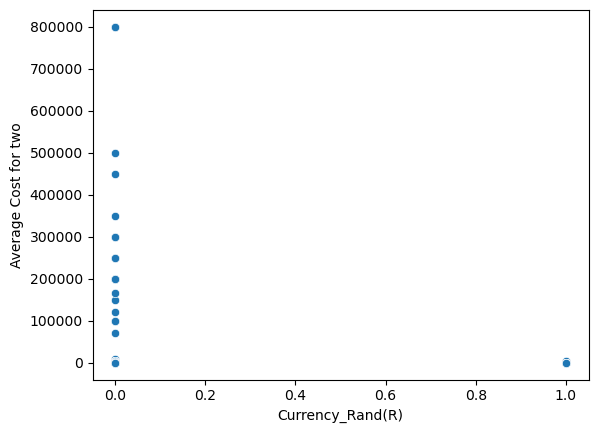

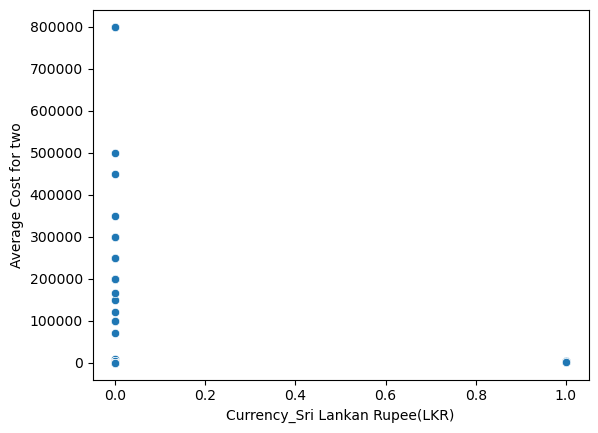

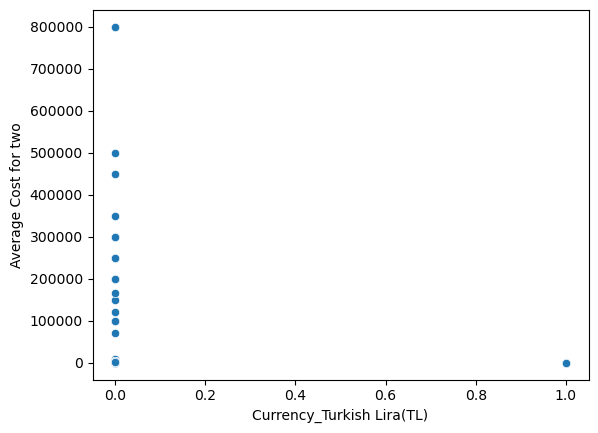

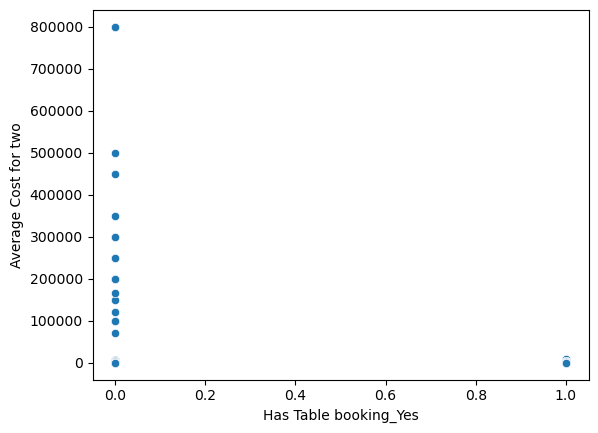

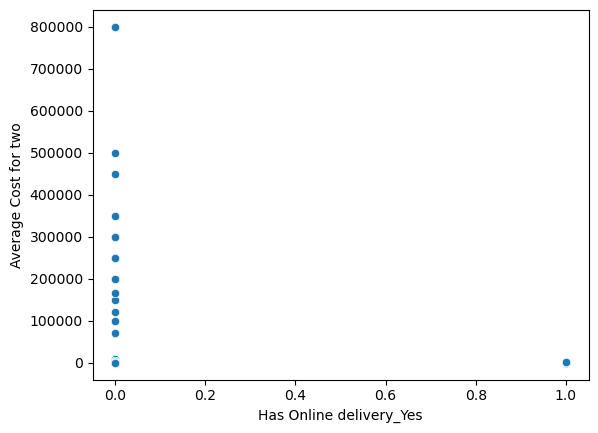

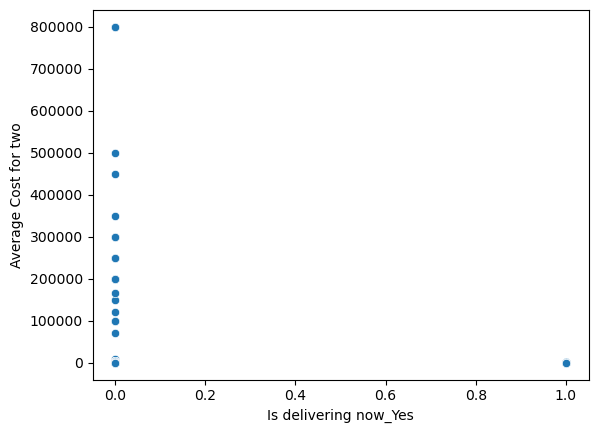

In [51]:
for i in df1.columns:
    sns.scatterplot(data=df1,x=i,y='Average Cost for two')
    plt.show()

In [52]:
sns.set(font_scale=1.5)

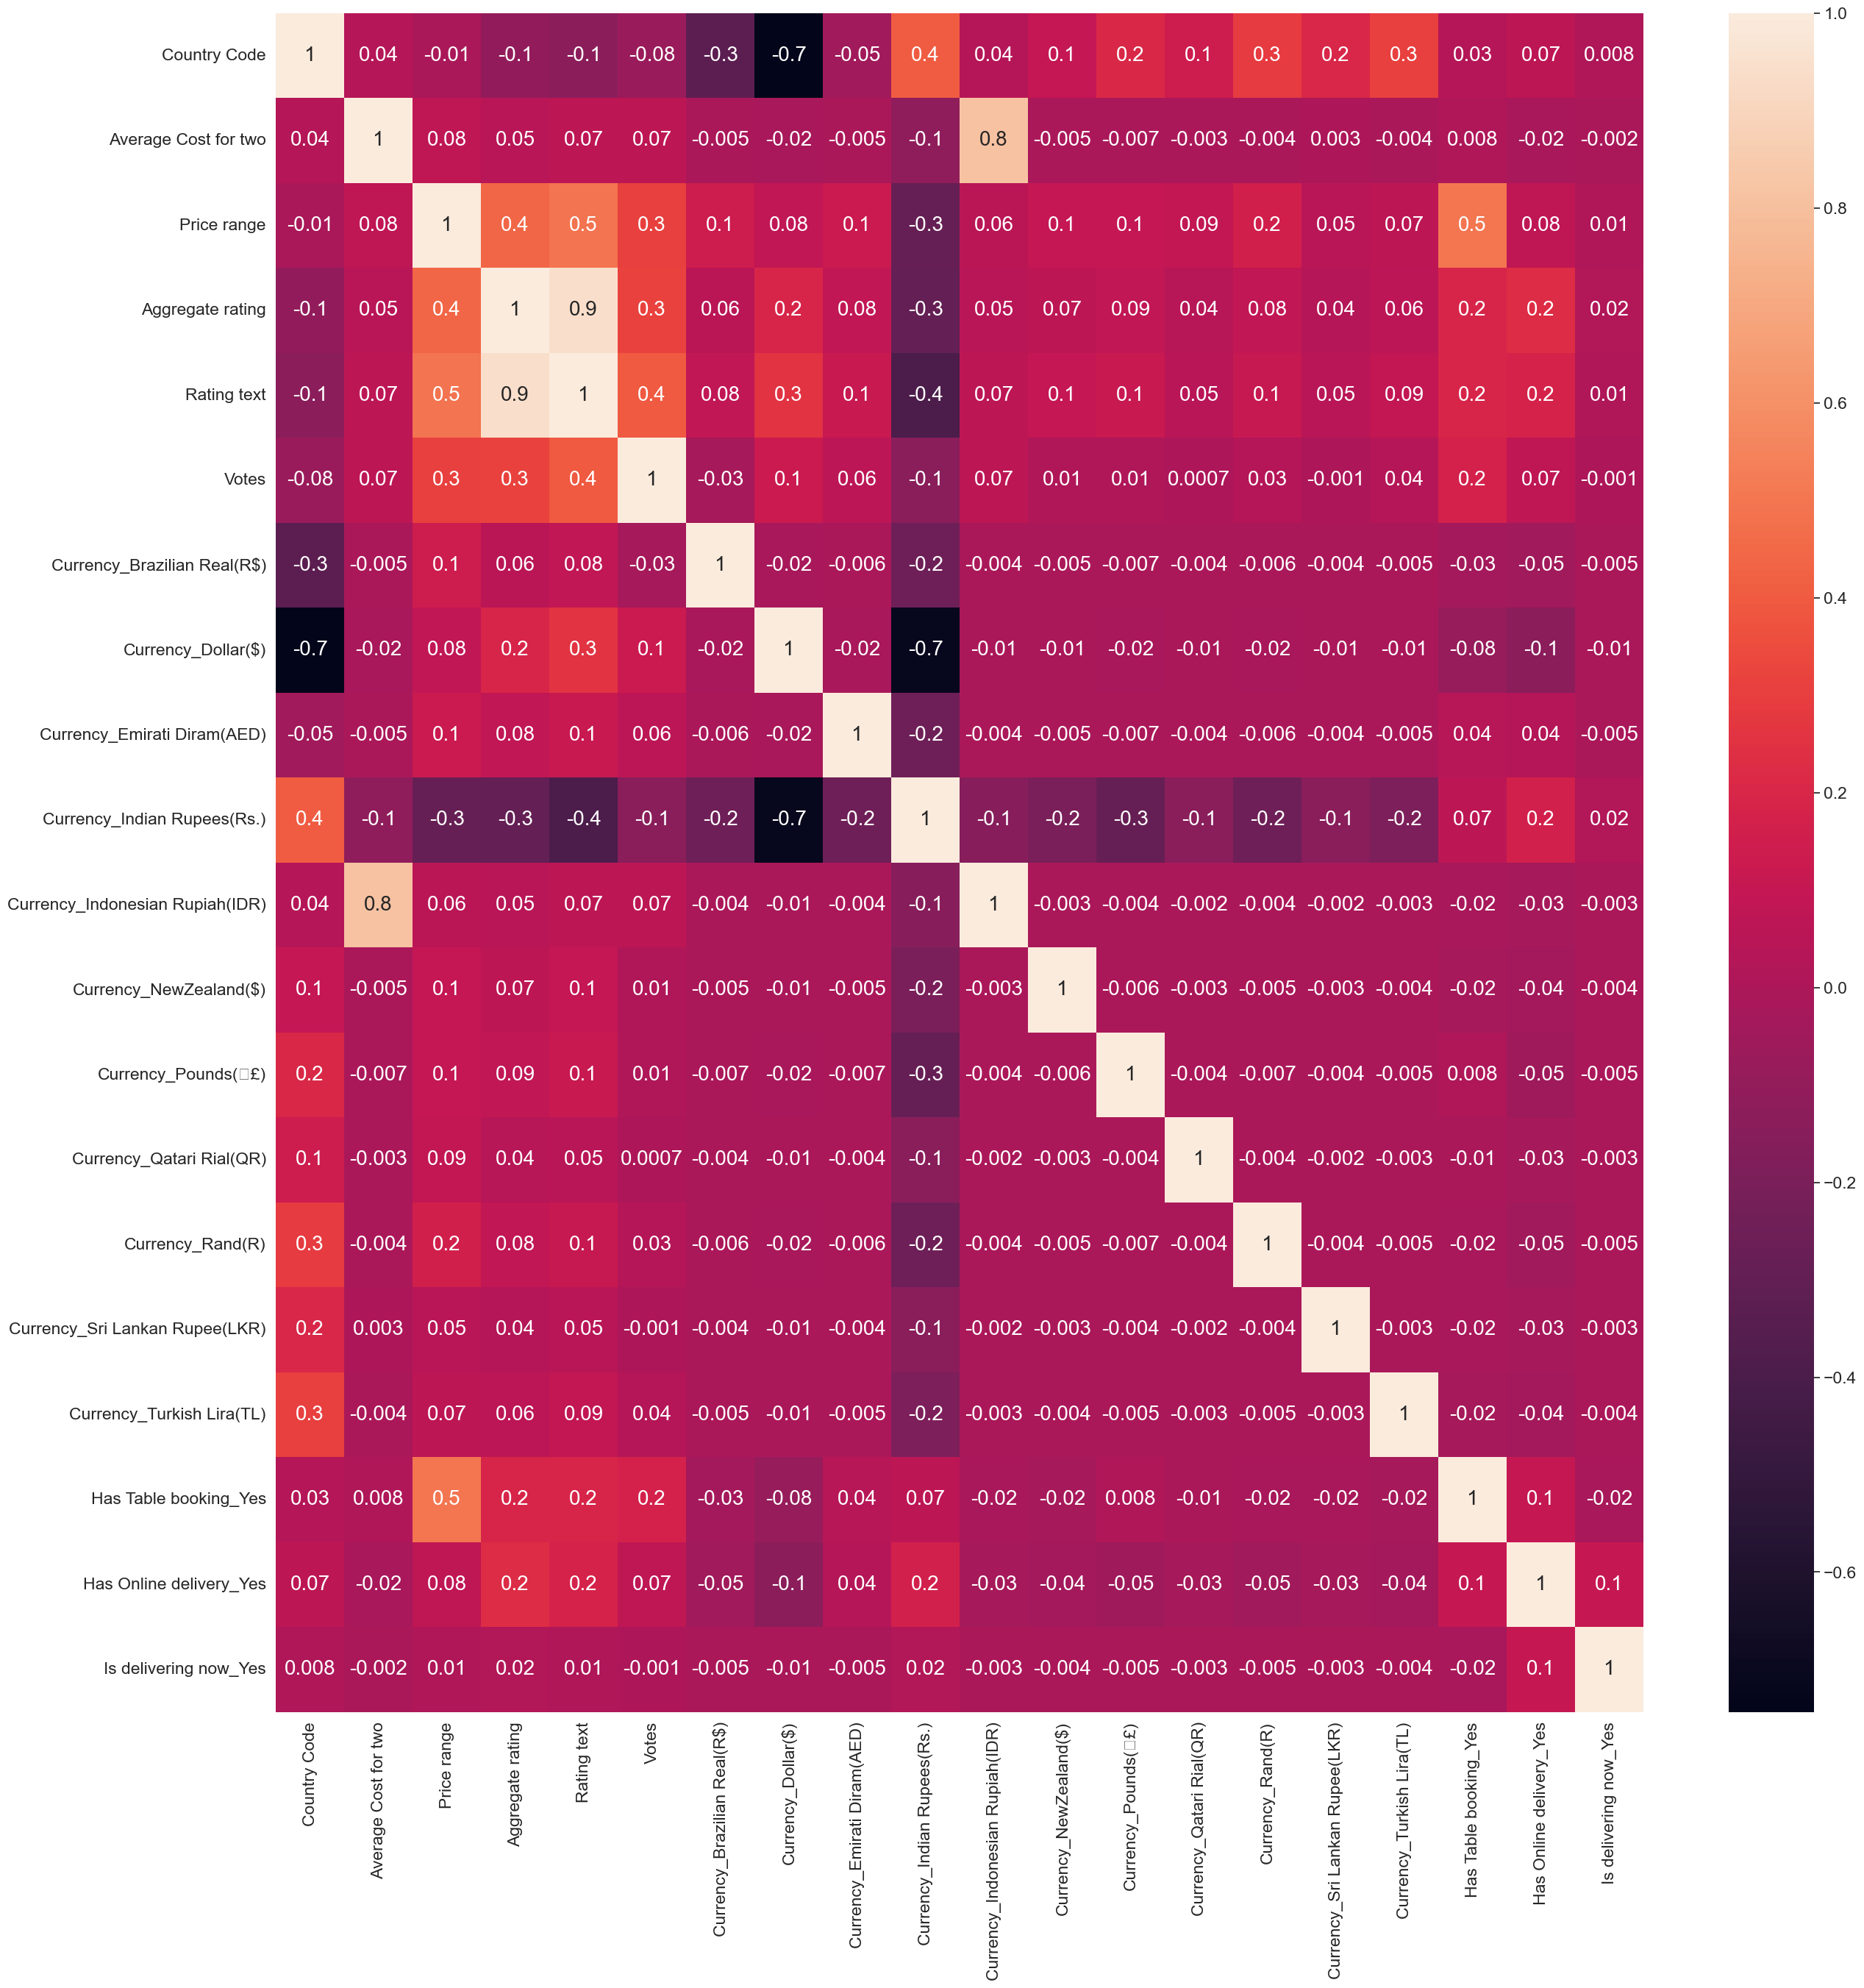

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':20})
sns.set(font_scale=1.5)

In [54]:
# Rating text and Aggregate rating are highly correlated so we to delete one of them
df1 = df1.drop('Rating text',axis=1)

In [55]:
# indonesian currency is highly correlated with averge cost for two
# the skewnes of currency is very high

.

.

.

In [57]:
country_code = pd.read_csv('Country-Code.csv',encoding=('ISO-8859-1'))
country_code

Country Code                   Country
0              1                     India
1             14                 Australia
2             30                    Brazil
3             37                    Canada
4             94                 Indonesia
5            148               New Zealand
6            162               Phillipines
7            166                     Qatar
8            184                 Singapore
9            189              South Africa
10           191                 Sri Lanka
11           208                    Turkey
12           214                       UAE
13           215            United Kingdom
14           216  United States of America

In [59]:
df = df.merge(country_code)

In [61]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [62]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [63]:
df[df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [64]:
# only India and UAE has online deliveriers

In [65]:
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Rating color', 'Rating text'],axis=1)
df.shape

(9542, 12)

In [66]:
df.City.value_counts()

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
             ... 
Panchkula       1
Huskisson       1
Forrest         1
Flaxton         1
Consort         1
Name: City, Length: 140, dtype: int64

In [67]:
df.Country.value_counts()

India                       8652
United States of America     425
United Kingdom                80
Brazil                        60
UAE                           60
South Africa                  60
New Zealand                   40
Turkey                        34
Australia                     24
Phillipines                   22
Indonesia                     21
Singapore                     20
Qatar                         20
Sri Lanka                     20
Canada                         4
Name: Country, dtype: int64

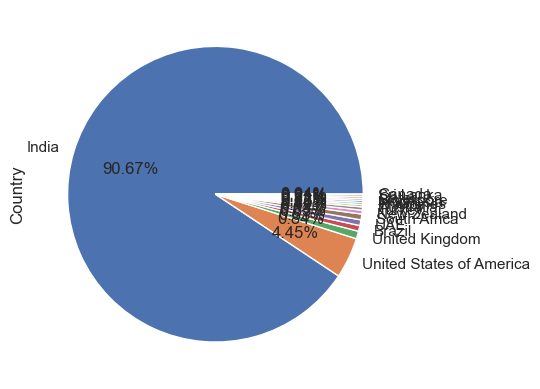

In [70]:
sns.set(font_scale=1)
df.Country.value_counts().plot.pie(autopct='%.2f%%')
sns.set(font_scale=1)

In [71]:
# Almost all of the data is from india 

In [72]:
df.Currency.value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  473
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

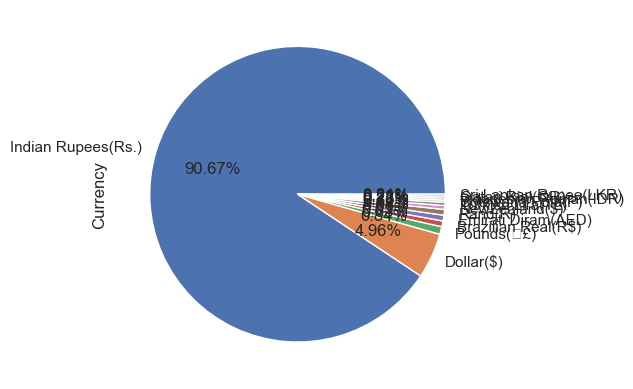

In [73]:
df.Currency.value_counts().plot.pie(autopct='%.2f%%')
sns.set(font_scale=1)

In [74]:
# Country and Currency are correlated 

In [75]:
country=df['Country']=='India'
df=df[country]

In [76]:
df = df.drop(['Country','Currency'],axis=1)

.

.

In [77]:
# creating a new column for number of Cuisines
df['cuisine_count'] = df['Cuisines'].apply(lambda x: x.count (',')+1)

In [78]:
df.columns

Index(['City', 'Cuisines', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Votes', 'cuisine_count'],
      dtype='object')

In [79]:
Cuisines_price = df.groupby('Cuisines')['Average Cost for two'].mean().reset_index()
Cuisines_price=Cuisines_price.rename(columns={'Average Cost for two':'Cuisines_cost'})
Cuisines_price

Cuisines  Cuisines_cost
0                                       Afghani     512.500000
1                     Afghani, Mughlai, Chinese     500.000000
2                         Afghani, North Indian     900.000000
3     Afghani, North Indian, Pakistani, Arabian     500.000000
4                                      American     666.666667
...                                         ...            ...
1387                       Tibetan, Street Food     100.000000
1388                                    Turkish     600.000000
1389       Turkish, Arabian, Moroccan, Lebanese     400.000000
1390     Turkish, Mediterranean, Middle Eastern    2000.000000
1391                                 Vietnamese    1000.000000

[1392 rows x 2 columns]

In [80]:
df=df.merge(Cuisines_price,on='Cuisines')
df

City                                           Cuisines  \
0      Agra                              North Indian, Mughlai   
1      Agra                              North Indian, Mughlai   
2      Agra                              North Indian, Mughlai   
3      Agra                              North Indian, Mughlai   
4      Agra                              North Indian, Mughlai   
...     ...                                                ...   
8647  Vizag  South Indian, Chinese, Continental, Italian, N...   
8648  Vizag                                    Biryani, Andhra   
8649  Vizag  Continental, Seafood, Chinese, North Indian, B...   
8650  Vizag                             Burger, Pizza, Biryani   
8651  Vizag          American, North Indian, Thai, Continental   

      Average Cost for two Has Table booking Has Online delivery  \
0                      850                No                  No   
1                      700                No                  No   
2                     2500                No                  No   
3                     3600                No                  No   
4                      900                No                  No   
...                    ...               ...                 ...   
8647                   600                No                  No   
8648                   450                No                  No   
8649                   600                No                  No   
8650                   600                No                  No   
8651                  1500                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  \
0                   No                   No            3               3.9   
1                   No                   No            2               3.5   
2                   No                   No            4               4.3   
3                   No                   No            4               3.8   
4                   No                   No            3               3.7   
...                ...                  ...          ...               ...   
8647                No                   No            2               4.1   
8648                No                   No            2               4.0   
8649                No                   No            2               3.6   
8650                No                   No            2               4.3   
8651                No                   No            4               3.8   

      Votes  cuisine_count  Cuisines_cost  
0       140              2     774.161677  
1        71              2     774.161677  
2       133              2     774.161677  
3        46              2     774.161677  
4       175              2     774.161677  
...     ...            ...            ...  
8647     75              5     600.000000  
8648    169              2     450.000000  
8649    193              5     600.000000  
8650    172              3     600.000000  
8651     74              4    1500.000000  

[8652 rows x 12 columns]

.

.

In [81]:
df.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Ahmedabad         21
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Ranchi            20
Coimbatore        20
Kolkata           20
Patna             20
Goa               20
Surat             20
Kochi             20
Jaipur            20
Puducherry        20
Nashik            20
Mysore            20
Mumbai            20
Vizag             20
Agra              20
Kanpur            20
Nagpur            20
Aurangabad        20
Bangalore         20
Dehradun          20
Indore            20
Ludhiana          20
Allahabad         20
Mangalore         20
Pune              20
Vadodara          20
Varanasi          20
Bhopal            20
Chennai           20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

In [82]:
city = df.City.isin(['New Delhi','Gurgaon','Noida','Faridabad'])
df=df[city]
df.shape

(7922, 12)

In [83]:
df.columns

Index(['City', 'Cuisines', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Votes', 'cuisine_count',
       'Cuisines_cost'],
      dtype='object')

In [84]:
df = df.drop(['Cuisines','Switch to order menu'],axis=1)
df.City = pd.factorize(df.City)[0]

In [85]:
ohe=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
ohetransform = ohe.fit_transform(df[['Has Table booking','Has Online delivery','Is delivering now']])
df = pd.concat([df,ohetransform],axis=1)
df

City  Average Cost for two Has Table booking Has Online delivery  \
10       0                   600                No                 Yes   
11       0                  1000               Yes                  No   
12       0                   500                No                  No   
13       0                   700                No                 Yes   
14       0                   700                No                 Yes   
...    ...                   ...               ...                 ...   
8593     3                  2500               Yes                  No   
8594     3                   200                No                  No   
8595     3                   450                No                 Yes   
8596     3                  1000               Yes                  No   
8597     3                   450                No                  No   

     Is delivering now  Price range  Aggregate rating  Votes  cuisine_count  \
10                  No            2               2.8     49              2   
11                  No            3               2.4     25              2   
12                  No            2               0.0      0              2   
13                  No            2               2.9     16              2   
14                  No            2               3.3    219              2   
...                ...          ...               ...    ...            ...   
8593                No            4               2.2    116              3   
8594                No            1               3.0     10              3   
8595                No            1               3.5    105              4   
8596                No            3               0.0      0              3   
8597                No            1               2.0    161              4   

      Cuisines_cost  Has Table booking_Yes  Has Online delivery_Yes  \
10       774.161677                    0.0                      1.0   
11       774.161677                    1.0                      0.0   
12       774.161677                    0.0                      0.0   
13       774.161677                    0.0                      1.0   
14       774.161677                    0.0                      1.0   
...             ...                    ...                      ...   
8593    2500.000000                    1.0                      0.0   
8594     200.000000                    0.0                      0.0   
8595     450.000000                    0.0                      1.0   
8596    1000.000000                    1.0                      0.0   
8597     450.000000                    0.0                      0.0   

      Is delivering now_Yes  
10                      0.0  
11                      0.0  
12                      0.0  
13                      0.0  
14                      0.0  
...                     ...  
8593                    0.0  
8594                    0.0  
8595                    0.0  
8596                    0.0  
8597                    0.0  

[7922 rows x 13 columns]

In [86]:
df = df.drop(['Has Table booking','Has Online delivery','Is delivering now'],axis=1)
df

City  Average Cost for two  Price range  Aggregate rating  Votes  \
10       0                   600            2               2.8     49   
11       0                  1000            3               2.4     25   
12       0                   500            2               0.0      0   
13       0                   700            2               2.9     16   
14       0                   700            2               3.3    219   
...    ...                   ...          ...               ...    ...   
8593     3                  2500            4               2.2    116   
8594     3                   200            1               3.0     10   
8595     3                   450            1               3.5    105   
8596     3                  1000            3               0.0      0   
8597     3                   450            1               2.0    161   

      cuisine_count  Cuisines_cost  Has Table booking_Yes  \
10                2     774.161677                    0.0   
11                2     774.161677                    1.0   
12                2     774.161677                    0.0   
13                2     774.161677                    0.0   
14                2     774.161677                    0.0   
...             ...            ...                    ...   
8593              3    2500.000000                    1.0   
8594              3     200.000000                    0.0   
8595              4     450.000000                    0.0   
8596              3    1000.000000                    1.0   
8597              4     450.000000                    0.0   

      Has Online delivery_Yes  Is delivering now_Yes  
10                        1.0                    0.0  
11                        0.0                    0.0  
12                        0.0                    0.0  
13                        1.0                    0.0  
14                        1.0                    0.0  
...                       ...                    ...  
8593                      0.0                    0.0  
8594                      0.0                    0.0  
8595                      1.0                    0.0  
8596                      0.0                    0.0  
8597                      0.0                    0.0  

[7922 rows x 10 columns]

In [87]:
sns.set(font_scale=2)

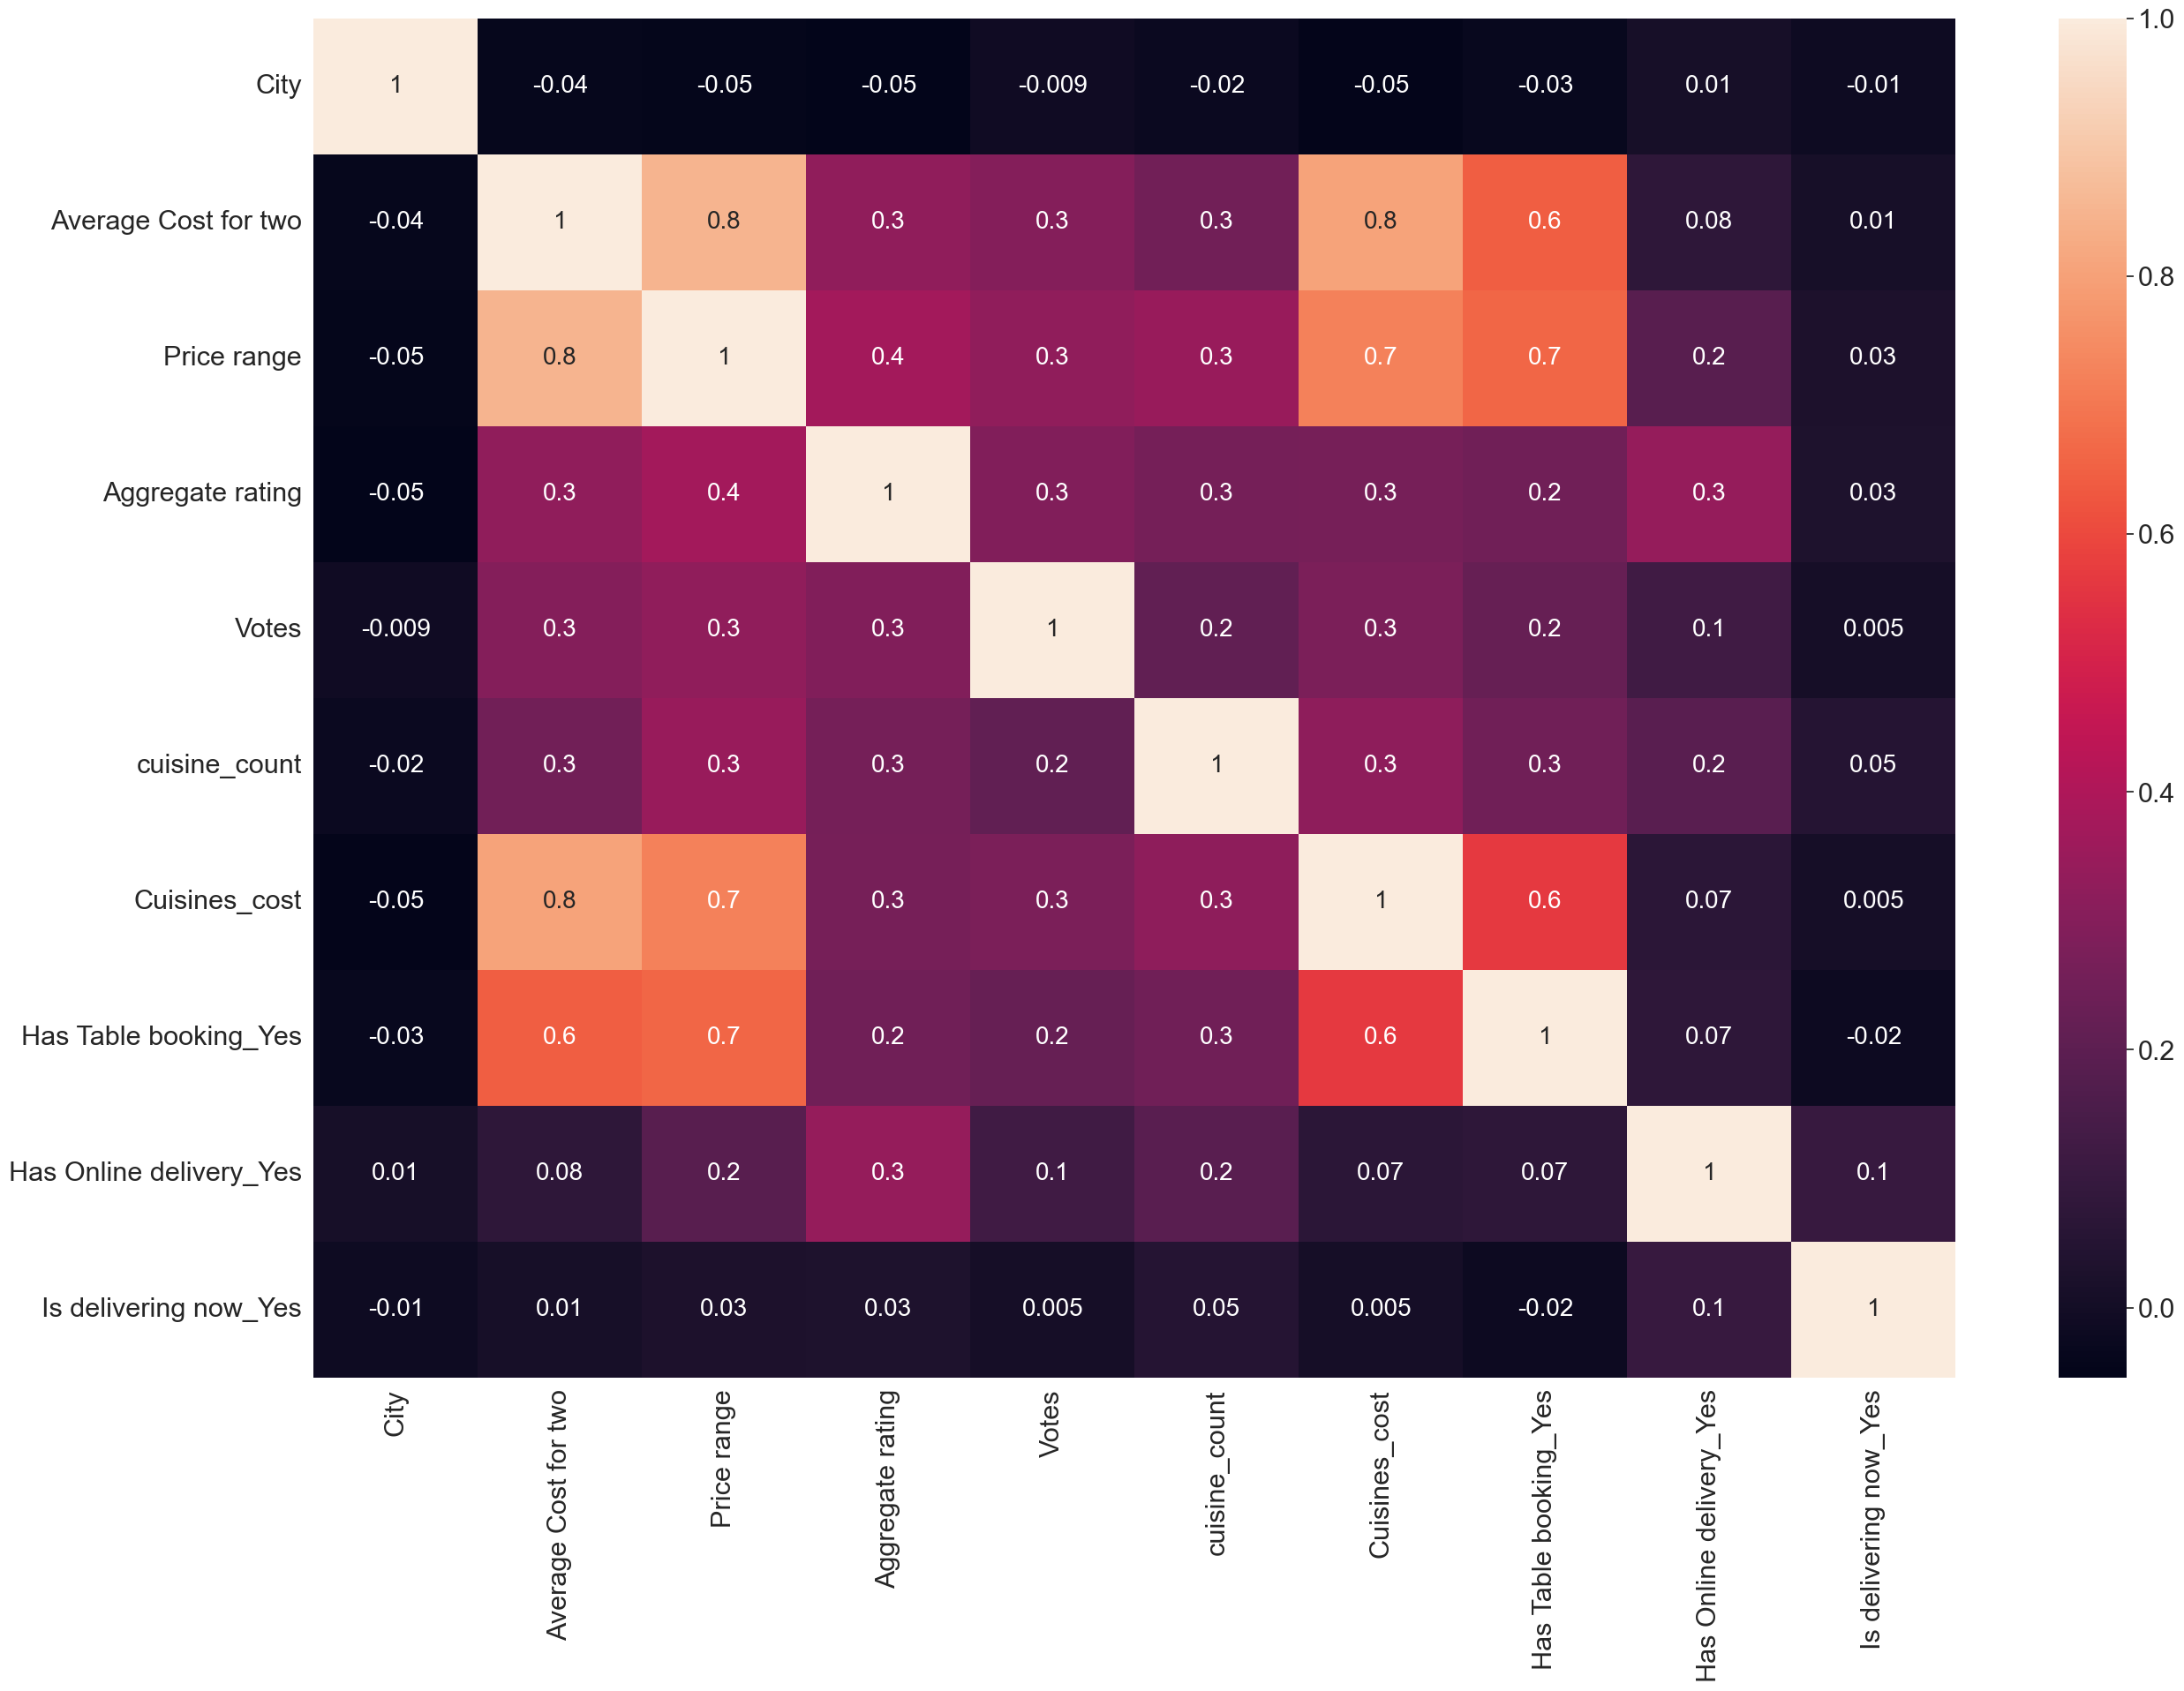

In [88]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':20})
sns.set(font_scale=2)

In [89]:
df.corr()['Average Cost for two']

City                      -0.038689
Average Cost for two       1.000000
Price range                0.847985
Aggregate rating           0.328440
Votes                      0.299089
cuisine_count              0.254590
Cuisines_cost              0.804124
Has Table booking_Yes      0.642966
Has Online delivery_Yes    0.076953
Is delivering now_Yes      0.009937
Name: Average Cost for two, dtype: float64

In [90]:
df.skew()

City                       -0.698002
Average Cost for two        3.820685
Price range                 1.154902
Aggregate rating           -0.804717
Votes                       8.553126
cuisine_count               1.358068
Cuisines_cost               3.738119
Has Table booking_Yes       2.174288
Has Online delivery_Yes     0.915248
Is delivering now_Yes      15.399824
dtype: float64

<Axes: >

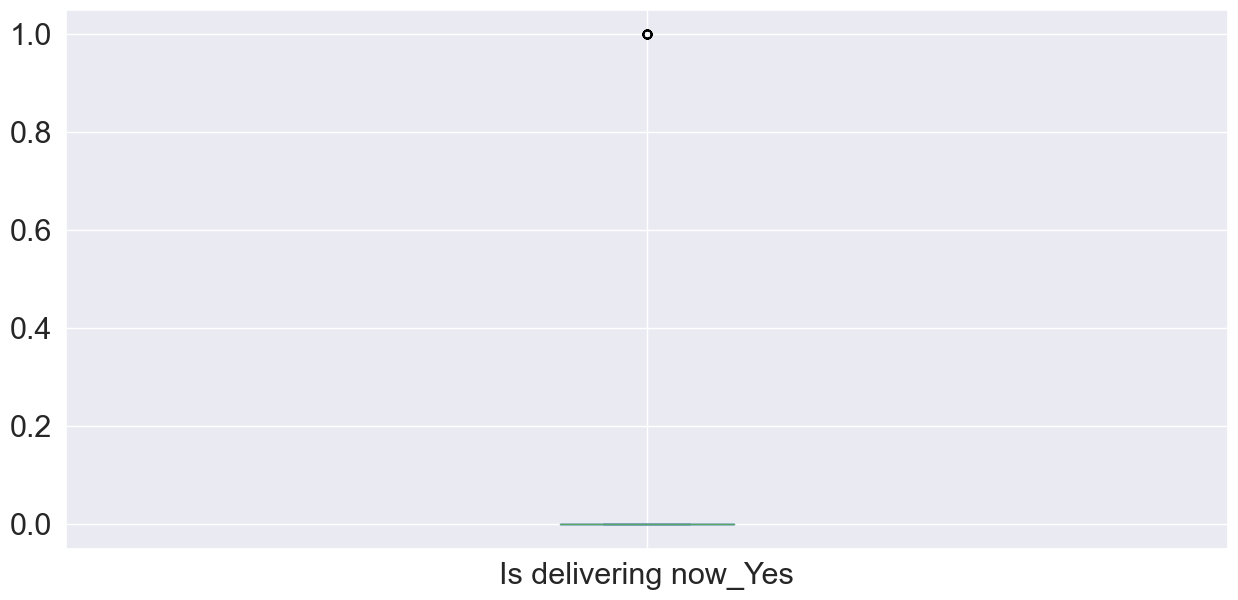

In [92]:
df['Is delivering now_Yes'].plot(kind='box',figsize=(15,7))

In [104]:
# votes and Is delivering now_Yes has very high skewness
# 'Is delivering now_Yes' is not contributing much to 'Average Cost for two'
df= df.drop('Is delivering now_Yes',axis=1)

In [105]:
df.describe()

City  Average Cost for two  Price range  Aggregate rating  \
count  7922.000000           7922.000000  7922.000000       7922.000000   
mean      1.931835            600.310528     1.646680          2.395834   
std       0.632135            599.587540     0.815057          1.509781   
min       0.000000             50.000000     1.000000          0.000000   
25%       2.000000            300.000000     1.000000          0.000000   
50%       2.000000            450.000000     1.000000          3.000000   
75%       2.000000            650.000000     2.000000          3.500000   
max       3.000000           8000.000000     4.000000          4.900000   

             Votes  cuisine_count  Cuisines_cost  Has Table booking_Yes  \
count  7922.000000    7922.000000    7922.000000            7922.000000   
mean    106.093663       2.014643     603.081645               0.132037   
std     323.243295       1.059897     468.453031               0.338553   
min       0.000000       1.000000      50.000000               0.000000   
25%       3.000000       1.000000     347.747748               0.000000   
50%      19.000000       2.000000     470.270270               0.000000   
75%      78.000000       3.000000     636.538462               0.000000   
max    7931.000000       8.000000    7000.000000               1.000000   

       Has Online delivery_Yes  
count              7922.000000  
mean                  0.291972  
std                   0.454698  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   1.000000  
max                   1.000000

In [106]:
sns.set(font_scale=1)

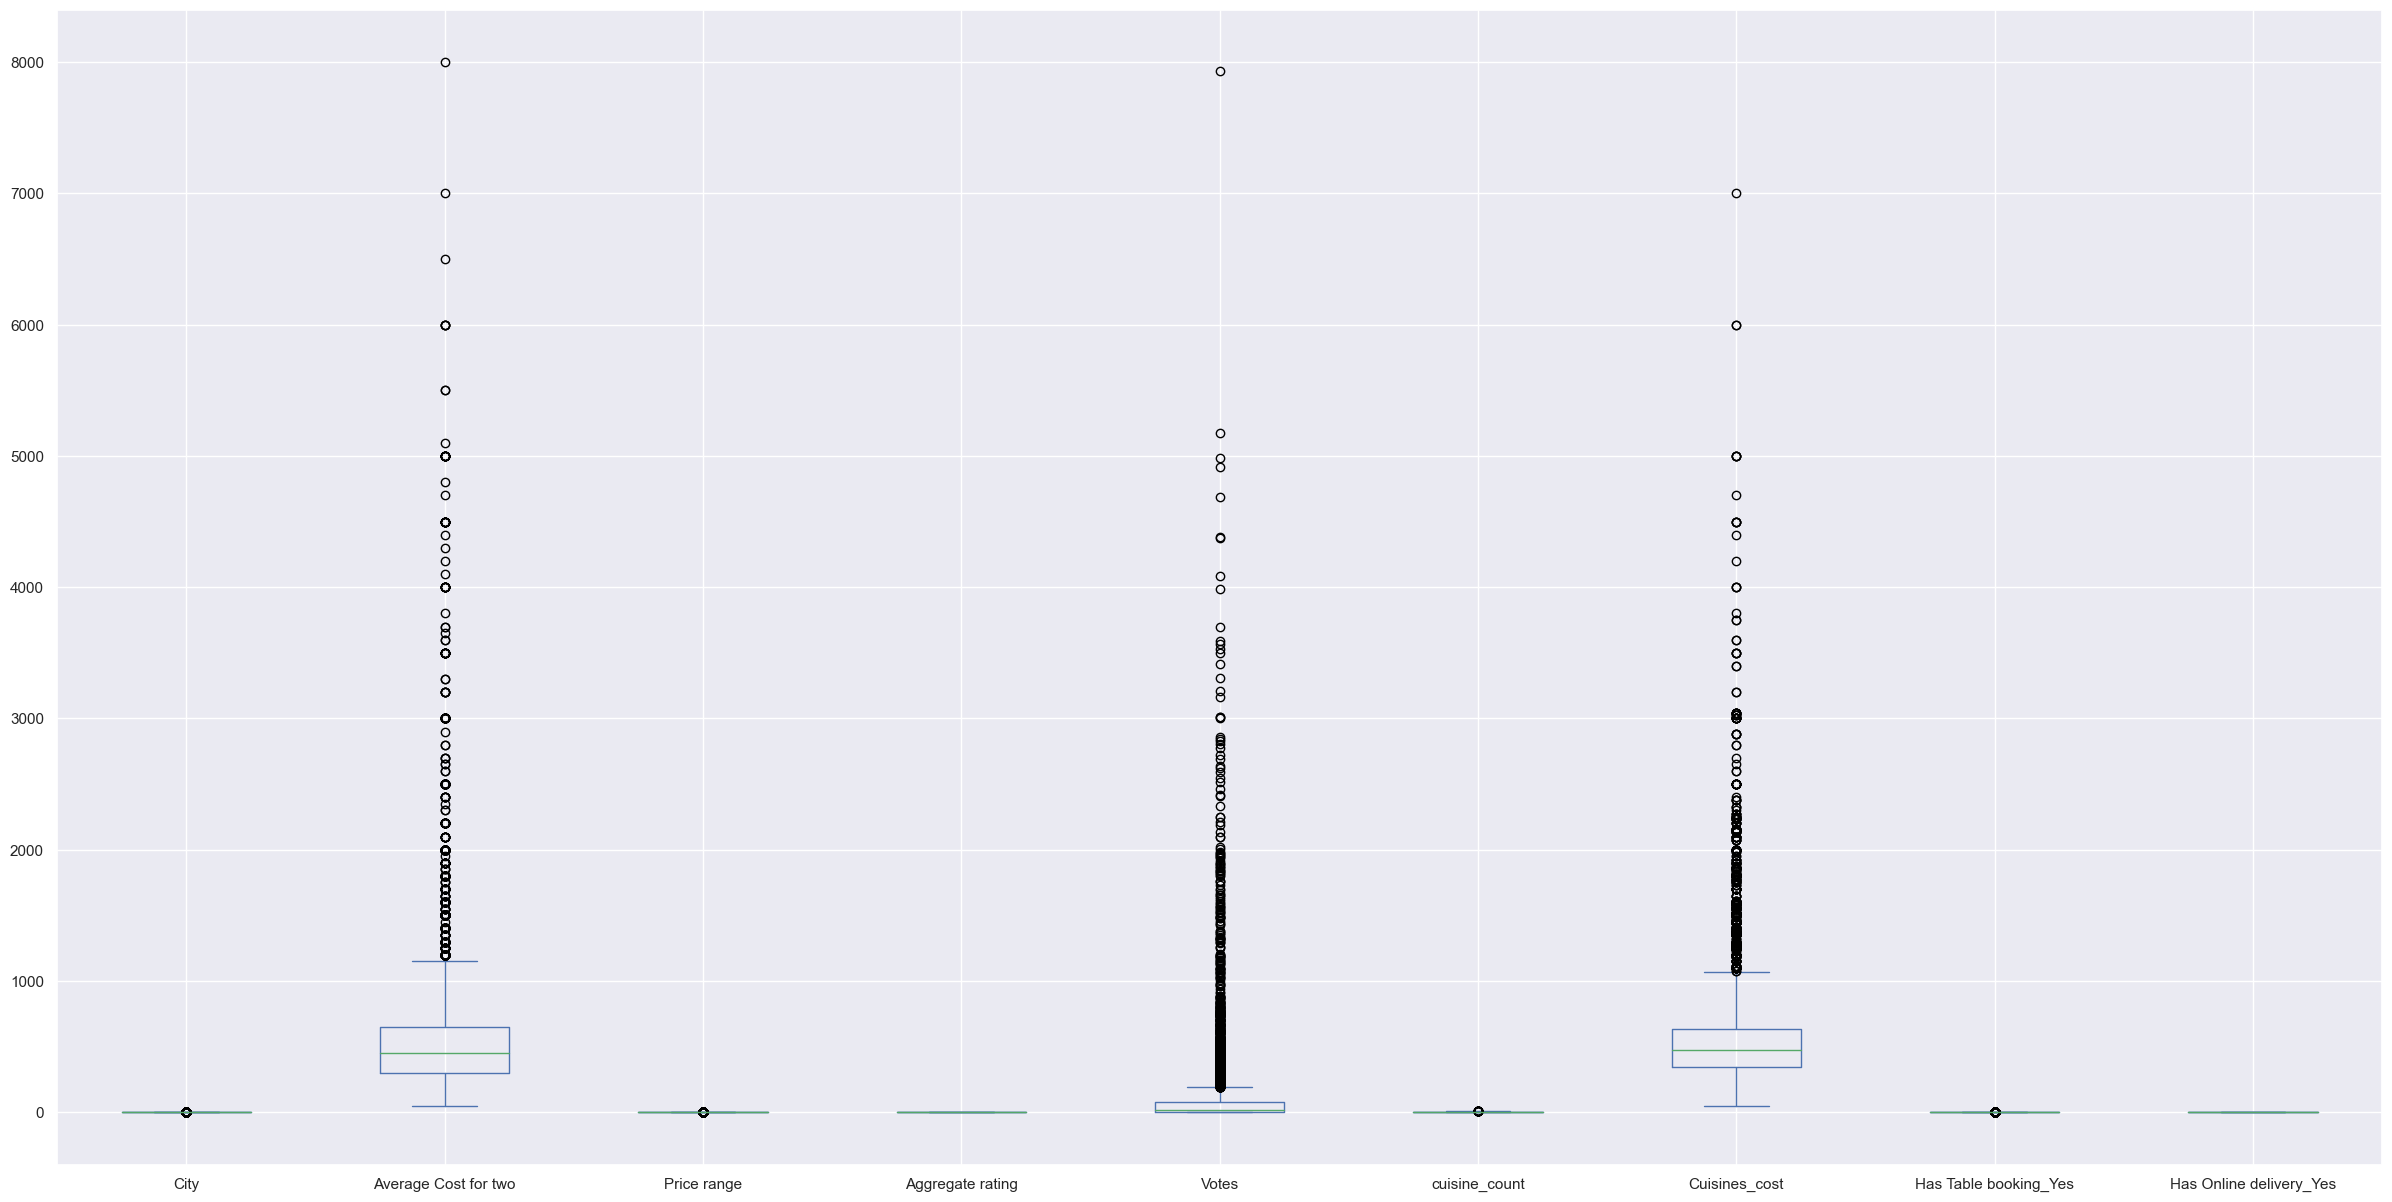

In [107]:
df.plot(kind='box',figsize=(30,15))
sns.set(font_scale=1)

In [108]:
df.skew()

City                      -0.698002
Average Cost for two       3.820685
Price range                1.154902
Aggregate rating          -0.804717
Votes                      8.553126
cuisine_count              1.358068
Cuisines_cost              3.738119
Has Table booking_Yes      2.174288
Has Online delivery_Yes    0.915248
dtype: float64

City
-0.6978693830952607


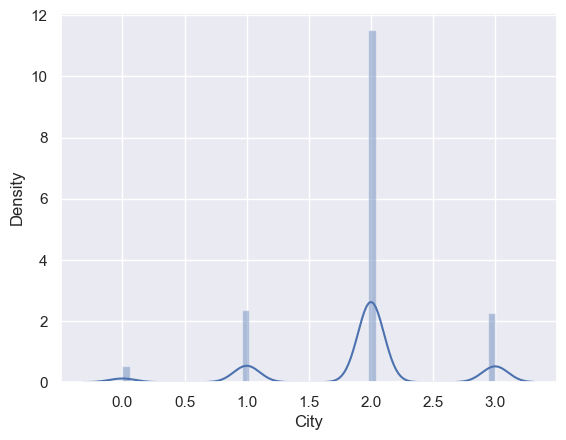

Average Cost for two
3.819961399740153


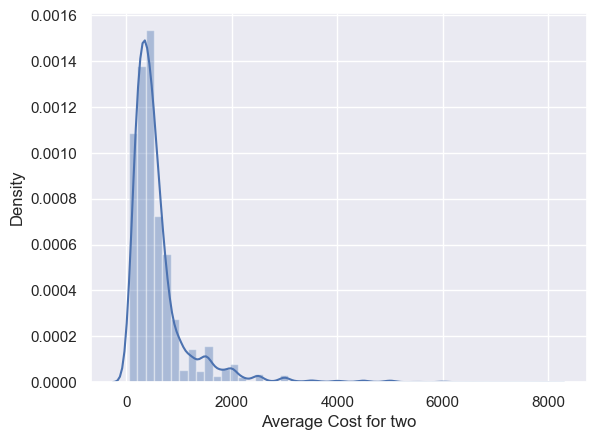

Price range
1.1546836879935118


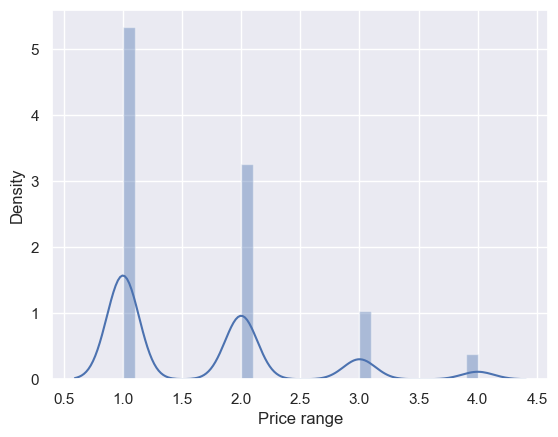

Aggregate rating
-0.8045646663714383


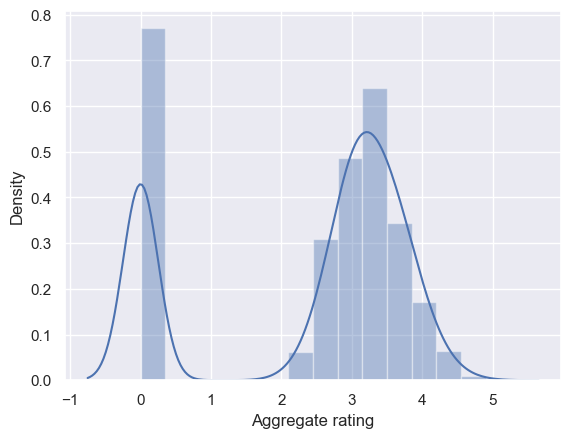

Votes
8.551506379749316


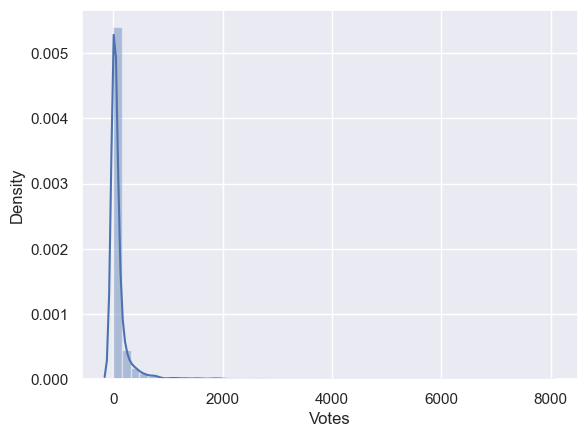

cuisine_count
1.3578109637986568


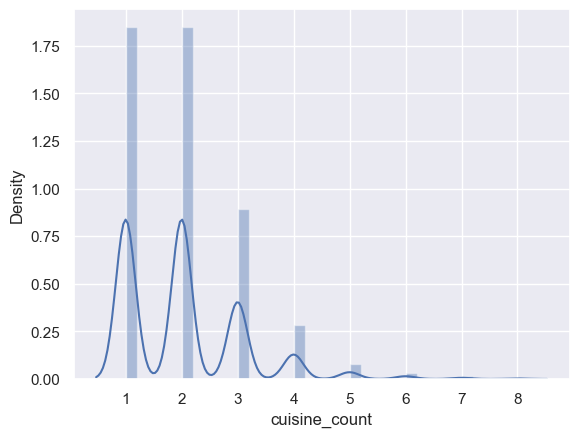

Cuisines_cost
3.7374108648612374


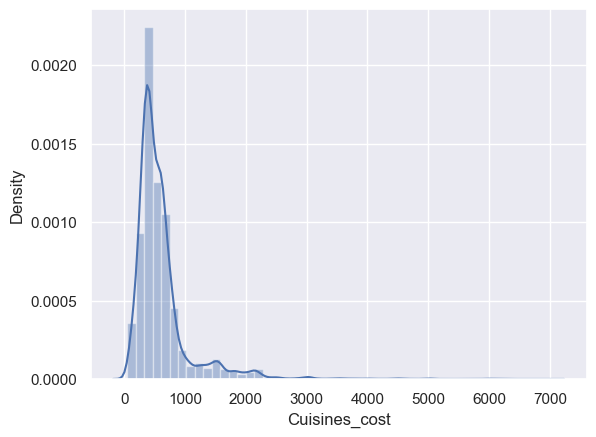

Has Table booking_Yes
2.1738760531010968


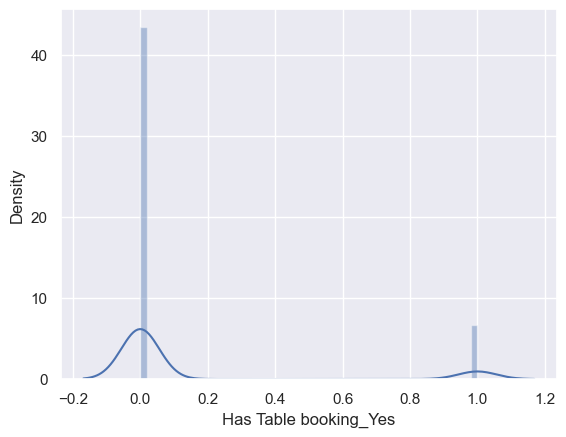

Has Online delivery_Yes
0.9150749496819522


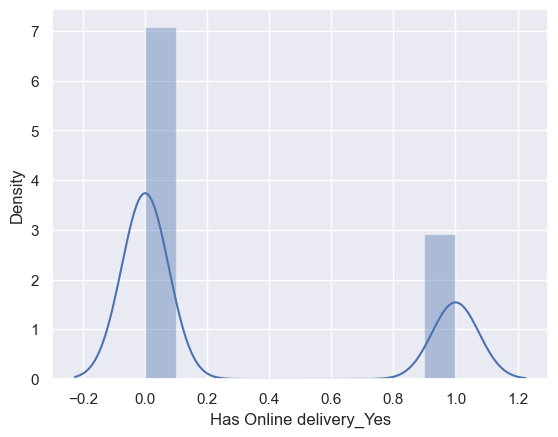

In [109]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

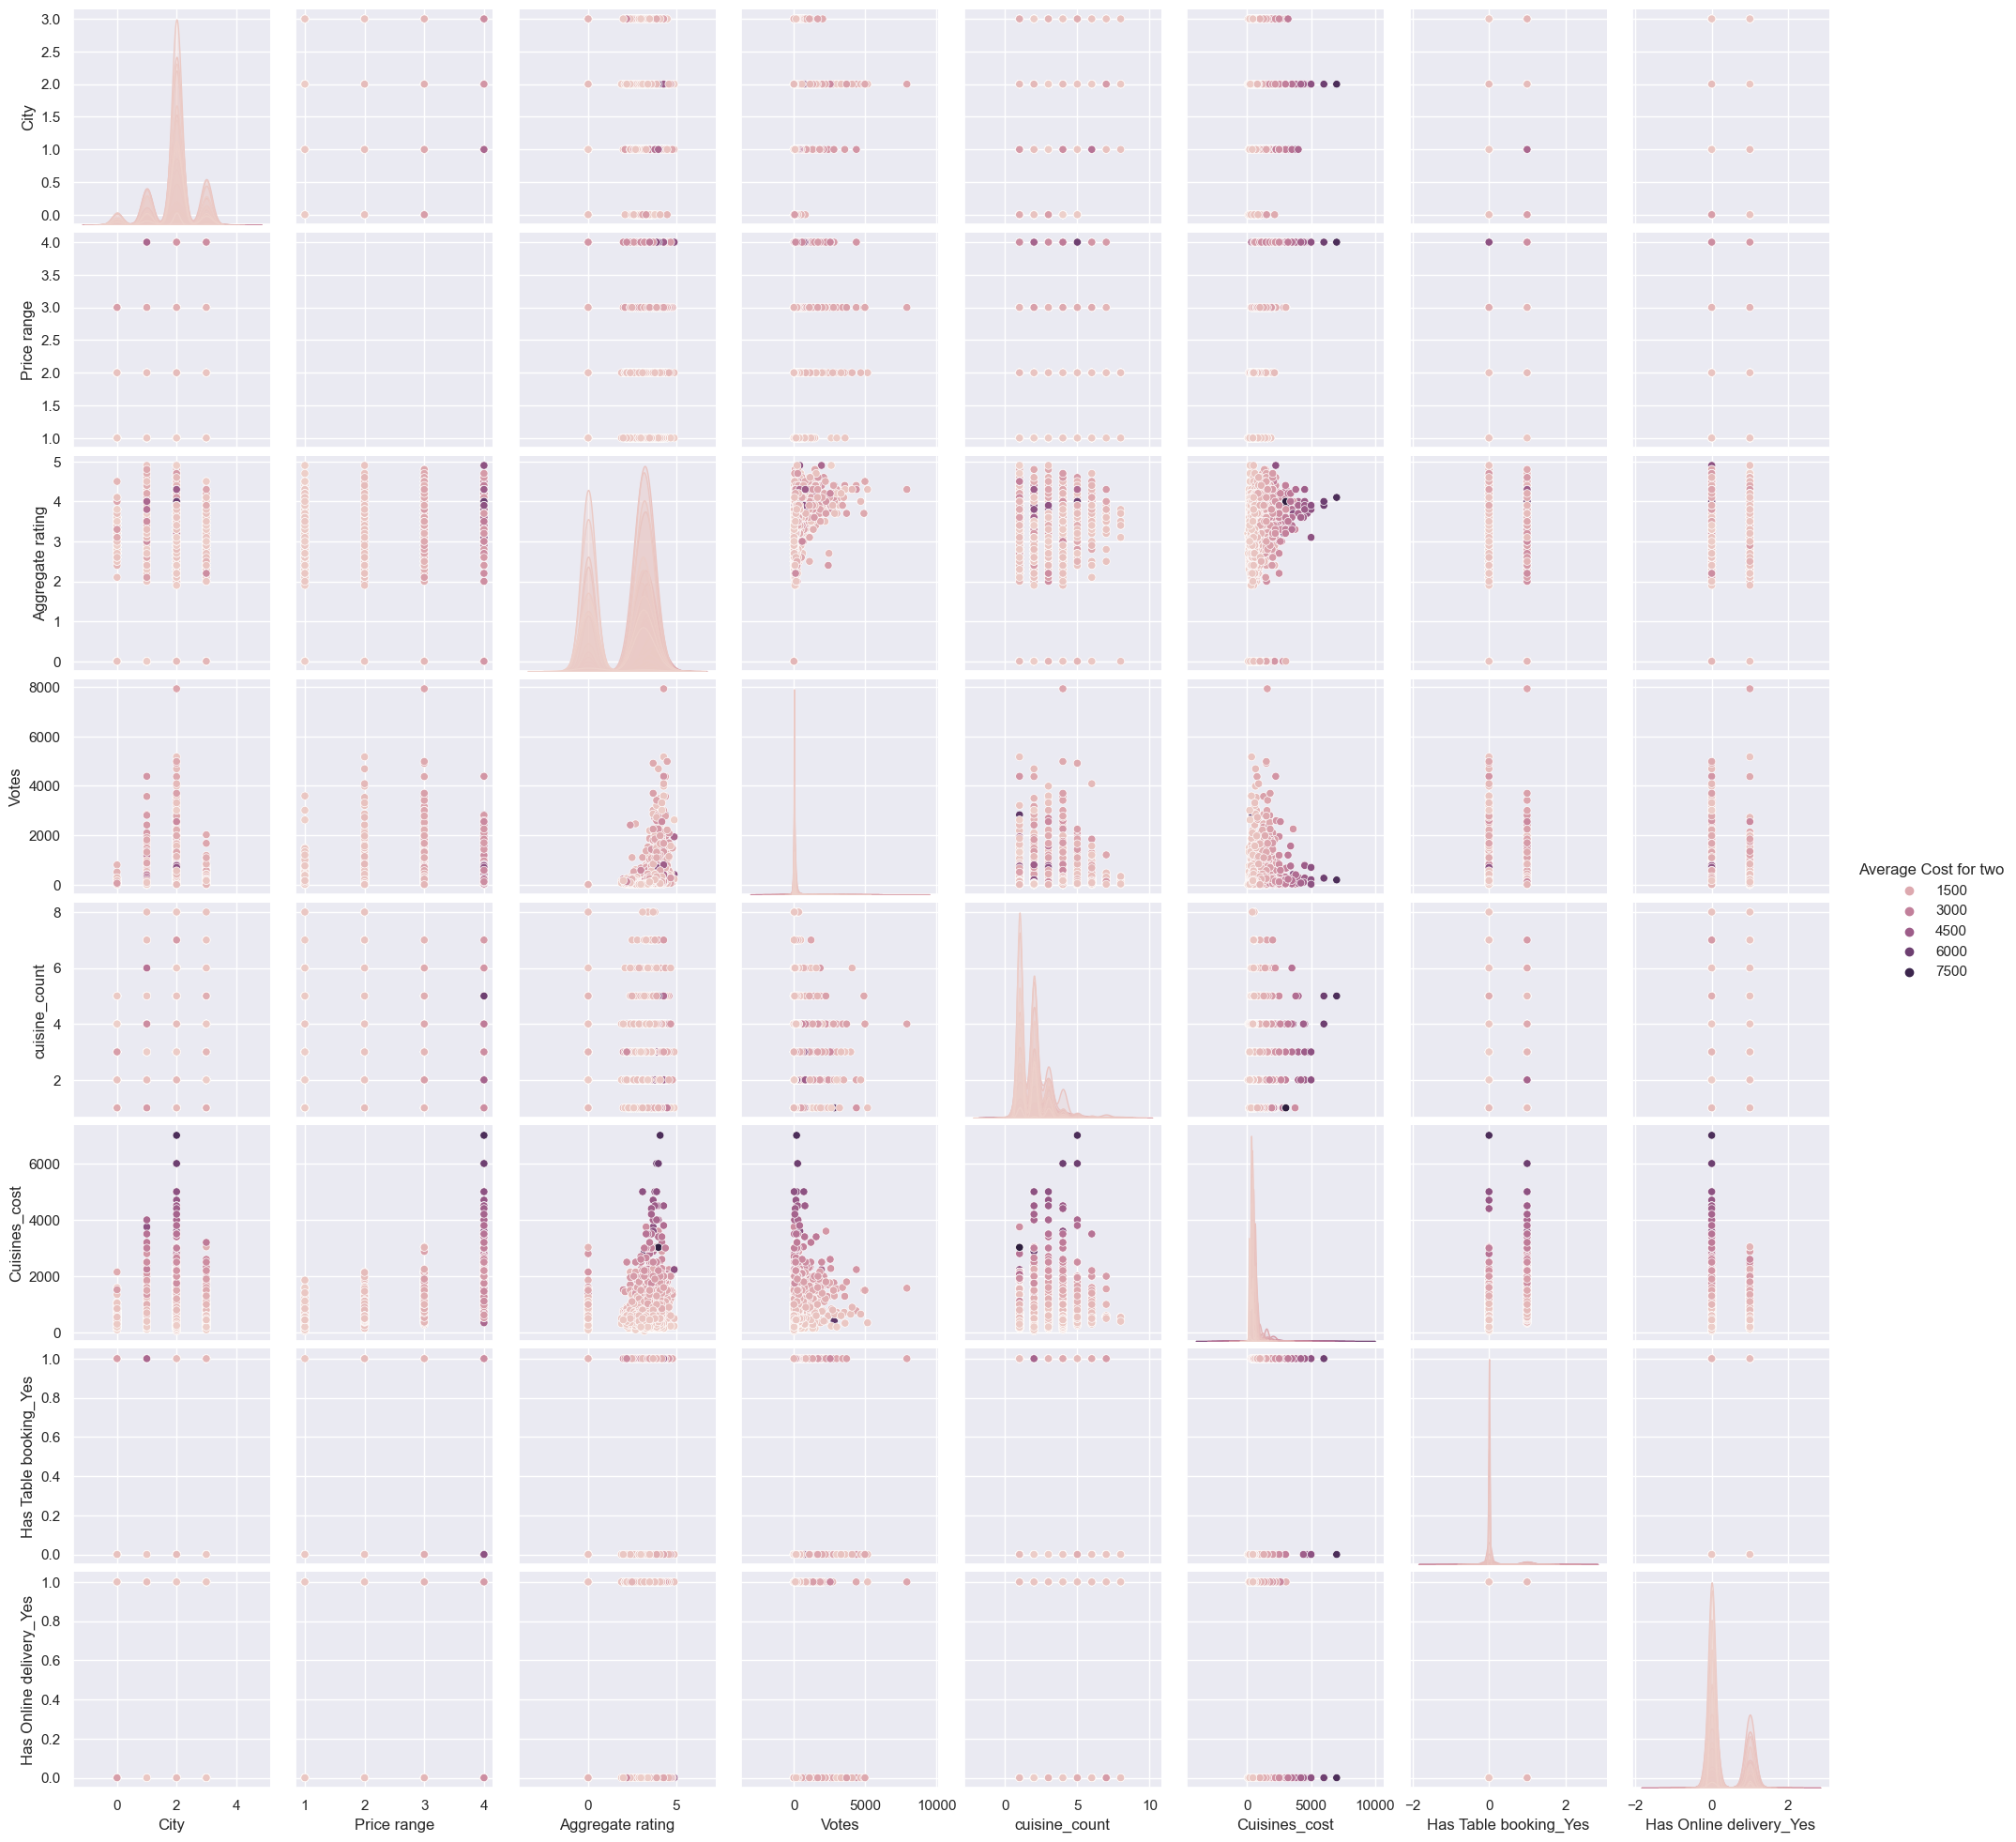

In [110]:
sns.pairplot(data=df,hue='Average Cost for two')

.

.

.

In [111]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor , AdaBoostRegressor , BaggingRegressor , VotingRegressor

In [112]:
from sklearn.metrics import accuracy_score , confusion_matrix , mean_squared_error

In [113]:
x=df.drop('Average Cost for two',axis=1)
y=df['Average Cost for two']

In [114]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

.

Training  :  0.29716490058962797
Testint :  0.27848801921420085
RMSE : 521.731739668667
[0.23859799 0.37115283 0.21441348 0.40770465 0.01860356]
0.25009450196580063


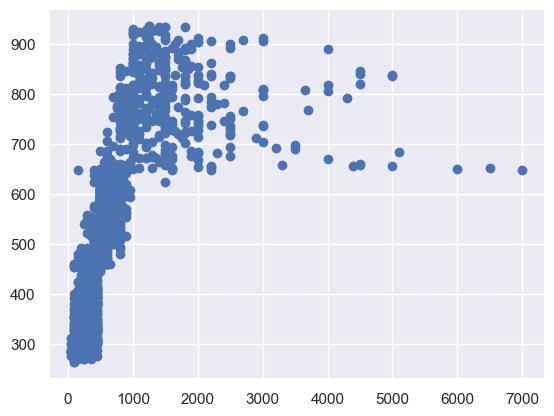

In [115]:
svm = SVR()
svm.fit(x_train_sca,y_train)
y_pred1 = svm.predict(x_test_sca)
svm1 = metrics.r2_score(y_test,y_pred1)

print('Training  : ',svm.score(x_train_sca,y_train))
print('Testint : ',svm.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

recheck = cross_val_score(svm,x,y,cv=5)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred1)

Training  :  0.9358010960771573
Testint :  0.915852651729385
RMSE : 178.17456277496197
[0.87816314 0.84132599 0.85851529 0.88867972 0.87641884]
0.8686205953125586


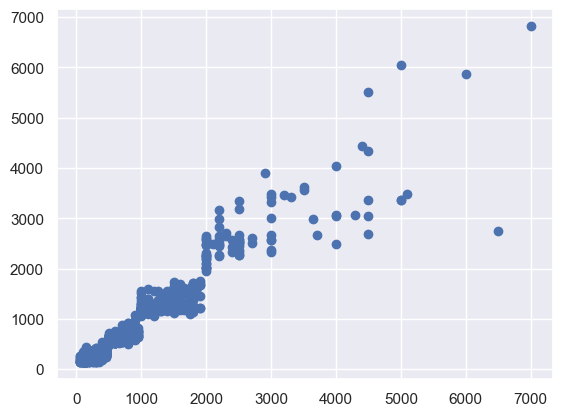

In [116]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_sca,y_train)
y_pred4= gbr.predict(x_test_sca)
gbr4 = metrics.r2_score(y_test,y_pred4)

print('Training  : ',gbr.score(x_train_sca,y_train))
print('Testint : ',gbr.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred4)))

recheck = cross_val_score(gbr,x,y,cv=5)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred4)

Training  :  0.8813031598395714
Testint :  0.8863739877833368
RMSE : 207.04481880646483
[0.86065685 0.76818429 0.83727194 0.83763226 0.80693042]
0.8221351518895027


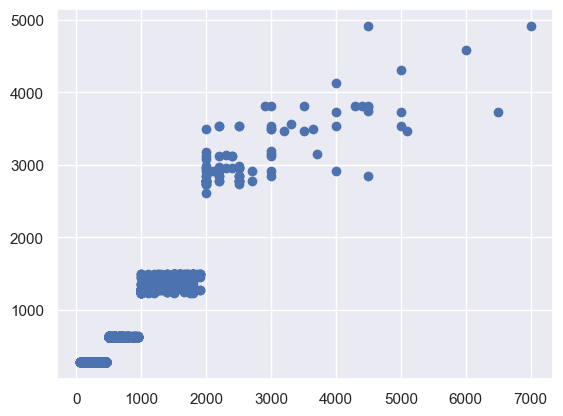

In [117]:
abr = AdaBoostRegressor()
abr.fit(x_train_sca,y_train)
abry_pred = abr.predict(x_test_sca)
abr1 = metrics.r2_score(y_test,abry_pred)

print('Training  : ',abr.score(x_train_sca,y_train))
print('Testint : ',abr.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,abry_pred)))

recheck = cross_val_score(abr,x,y,cv=5)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=abry_pred)

Training  :  0.9761384396397665
Testint :  0.9106572819076931
RMSE : 183.5925546177593
[0.85020543 0.85006327 0.81890805 0.87570079 0.84399964]
0.8477754368414556


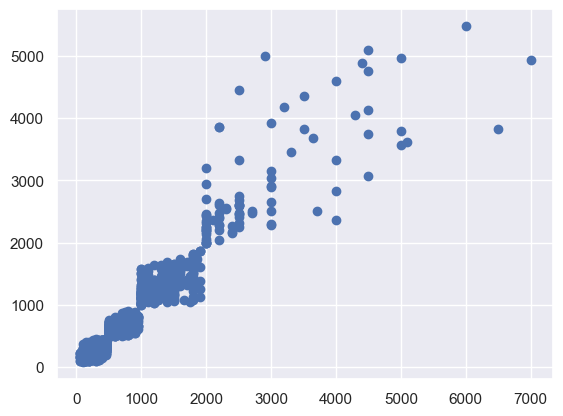

In [118]:
br = BaggingRegressor()
br.fit(x_train_sca,y_train)
bry_pred = br.predict(x_test_sca)
br1 = metrics.r2_score(y_test,bry_pred)

print('Training  : ',br.score(x_train_sca,y_train))
print('Testint : ',br.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,bry_pred)))

recheck = cross_val_score(br,x,y,cv=5)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=bry_pred)

Training  :  0.8117709915360379
Testint :  0.8036768883930674
RMSE : 272.1517923170242
[0.72814031 0.57395858 0.77995606 0.73790344 0.79509484 0.78790396
 0.57014824 0.81710567 0.72752327 0.55491309 0.65173963 0.77964153
 0.80334436 0.86163752 0.88978032]
0.7372527225450322


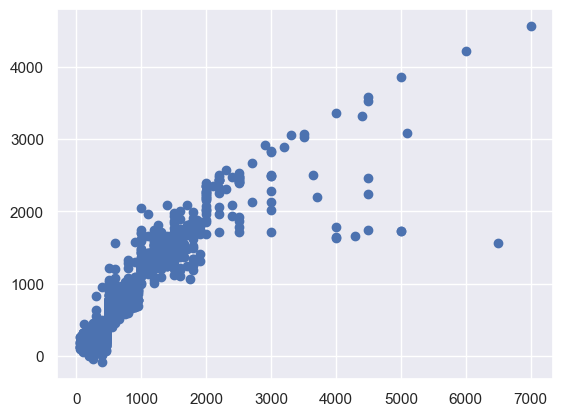

In [119]:
lr= LinearRegression()
lr.fit(x_train_sca,y_train)
y_pred2 = lr.predict(x_test_sca)
lr2 = metrics.r2_score(y_test,y_pred2)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testint : ',lr.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

recheck = cross_val_score(lr,x,y,cv=15)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred2)

Training  :  0.9182372722822174
Testint :  0.8755197200698286
RMSE : 216.70840843612015
[0.23326929 0.54410753 0.24712812 0.65776278 0.74496358]
0.4854462601896409


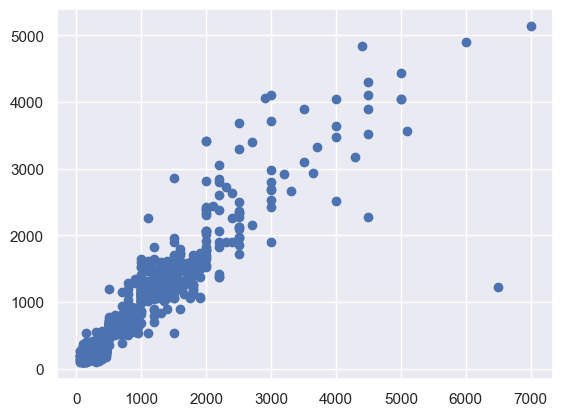

In [123]:
knr = KNeighborsRegressor()
knr.fit(x_train_sca,y_train)
knry_pred = knr.predict(x_test_sca)
knr1 = metrics.r2_score(y_test,knry_pred)

print('Training  : ',knr.score(x_train_sca,y_train))
print('Testint : ',knr.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,knry_pred)))

recheck = cross_val_score(knr,x,y,cv=5)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=knry_pred)

Training  :  0.9811122870162049
Testint :  0.9212934509866895
RMSE : 172.31810886757208
[0.81216415 0.87840957 0.88905396 0.86718764 0.86020406 0.81412791
 0.84693884 0.91089366 0.86757663 0.81651703 0.8038268  0.8572816
 0.84582655 0.92145362 0.96177795]
0.8635493329857908


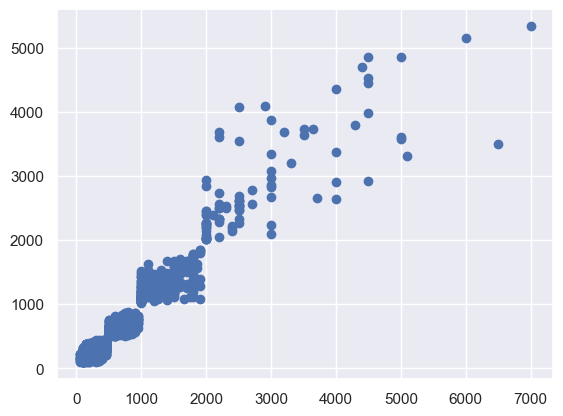

In [124]:
rfr= RandomForestRegressor()
rfr.fit(x_train_sca,y_train)
y_pred3 = rfr.predict(x_test_sca)
rfr3 = metrics.r2_score(y_test,y_pred3)

print('Training  : ',rfr.score(x_train_sca,y_train))
print('Testint : ',rfr.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

recheck = cross_val_score(rfr,x,y,cv=15)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred3)

Training  :  0.9964390932398153
Testint :  0.8824669661237683
RMSE : 210.57434466958236
[0.80378386 0.77309327 0.84428403 0.81569841 0.74267998]
0.7959079068573158


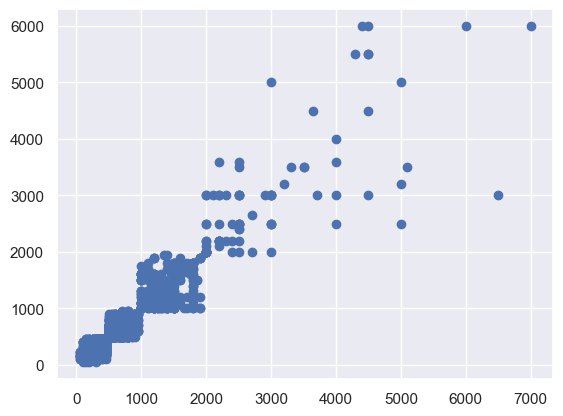

In [125]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_sca,y_train)
y_pred5= dtr.predict(x_test_sca)
dtr5 = metrics.r2_score(y_test,y_pred5)

print('Training  : ',dtr.score(x_train_sca,y_train))
print('Testint : ',dtr.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

recheck = cross_val_score(dtr,x,y,cv=5)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=y_pred5)

Training  :  0.9951851096924939
Testint :  0.9057084171468404
RMSE : 188.60879808975784
[0.84115928 0.77136742 0.83231975 0.84708834 0.8051594 ]
0.8194188366888984


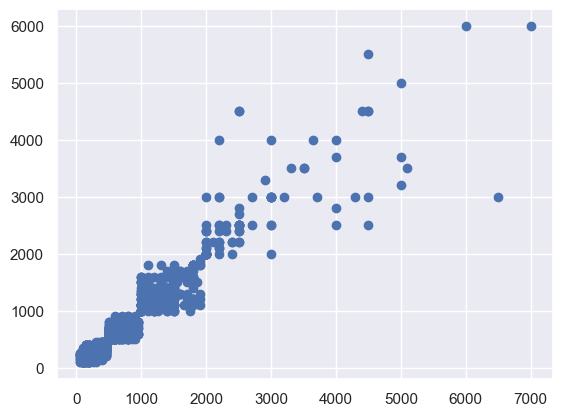

In [126]:
abr = AdaBoostRegressor(dtr)
abr.fit(x_train_sca,y_train)
abry_pred = abr.predict(x_test_sca)
abr1 = metrics.r2_score(y_test,abry_pred)

print('Training  : ',abr.score(x_train_sca,y_train))
print('Testint : ',abr.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,abry_pred)))

recheck = cross_val_score(abr,x,y,cv=5)
print(recheck)
print(recheck.mean())

plt.scatter(x=y_test,y=abry_pred)

[0.7984772  0.8040932  0.86516623 0.81965216 0.86296585 0.82219077
 0.78866711 0.89510195 0.83349313 0.81374929 0.80026064 0.85299615
 0.84854165 0.92240048 0.961258  ]
0.8459342552474929
Training  :  0.9657080299164065
Testint :  0.9173327493758717
RMSE : 176.60062303558323


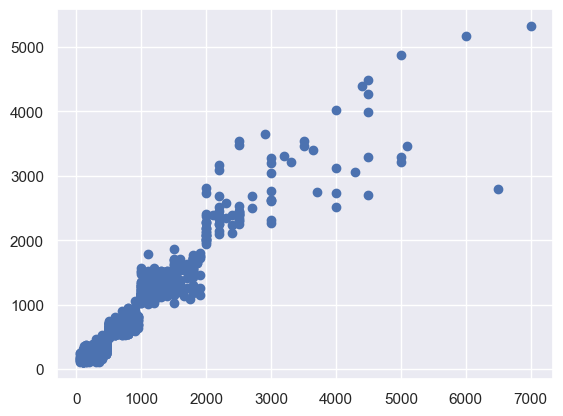

In [127]:
Regressor = [('RandomForestRegressor',rfr),('GradientBoostingRegressor',gbr),('BaggingRegressor',br),('LinearRegression',lr),('AdaBoostRegressor',abr),('KNeighborsRegressor',knr)]
vc= VotingRegressor(estimators=Regressor)
vc.fit(x_train_sca,y_train)
vcy_pred = vc.predict(x_test_sca)

recheck = cross_val_score(vc,x,y,cv=15)
print(recheck)
print(recheck.mean())

print('Training  : ',vc.score(x_train_sca,y_train))
print('Testint : ',vc.score(x_test_sca,y_test))

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,vcy_pred)))

plt.scatter(x=y_test,y=vcy_pred)

.

.

.

##  rfr= RandomForestRegressor is the best 

In [128]:
import joblib
joblib.dump(rfr,'zomato_avg2.obj')

['zomato_avg2.obj']

.

.

.

.

.

.

In [97]:
x=df.drop('Price range',axis=1)
y=df['Price range']

In [98]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier , VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

.

In [100]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testint : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.9639314697926059
Testint :  0.935633151030711
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      1265
           2       0.90      0.94      0.92       768
           3       0.86      0.84      0.85       255
           4       0.91      0.80      0.85        89

    accuracy                           0.94      2377
   macro avg       0.91      0.88      0.90      2377
weighted avg       0.94      0.94      0.94      2377

[0.98548896 0.98422713 0.98295455 0.99242424 0.98106061]
0.985231096453494
difference -0.04959794542278306


In [101]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testint : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

Training  :  0.855004508566276
Testint :  0.854438367690366
              precision    recall  f1-score   support

           1       0.84      0.98      0.90      1265
           2       0.94      0.62      0.75       768
           3       0.78      0.92      0.84       255
           4       0.91      0.88      0.89        89

    accuracy                           0.85      2377
   macro avg       0.87      0.85      0.85      2377
weighted avg       0.87      0.85      0.85      2377

[0.85362776 0.84227129 0.82575758 0.88888889 0.84532828]
0.8511747602205016
difference 0.003263607469864316


In [102]:
rfc= RandomForestClassifier(n_estimators= 500, min_samples_split= 8, max_features=5, max_depth= 20, criterion='gini')
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1265
           2       1.00      1.00      1.00       768
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00        89

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
difference 0.0
[[1265    0    0    0]
 [   0  768    0    0]
 [   0    0  255    0]
 [   0    0    0   89]]


In [103]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testint : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  0.8991884580703337
Testint :  0.8927219183845183
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1265
           2       0.75      1.00      0.86       768
           3       0.00      0.00      0.00       255
           4       1.00      1.00      1.00        89

    accuracy                           0.89      2377
   macro avg       0.69      0.75      0.71      2377
weighted avg       0.81      0.89      0.85      2377

[0.89716088 0.89716088 0.89772727 0.89709596 0.89709596]
0.8972481916961412
difference -0.004526273311622919


In [104]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1265
           2       1.00      1.00      1.00       768
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00        89

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [105]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testint : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1265
           2       1.00      1.00      1.00       768
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00        89

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [106]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testint : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

Training  :  0.993507664562669
Testint :  0.993689524610854
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1265
           2       0.99      0.99      0.99       768
           3       0.98      0.98      0.98       255
           4       0.97      0.99      0.98        89

    accuracy                           0.99      2377
   macro avg       0.98      0.99      0.99      2377
weighted avg       0.99      0.99      0.99      2377

[0.67760252 0.78044164 0.71717172 0.74305556 0.69065657]
0.7217856004843387
difference 0.2719039241265153


In [107]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1265
           2       1.00      1.00      1.00       768
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00        89

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [108]:
classifier = [('RandomForestClassifier',rfc),('GradientBoostingClassifier',gbcbest),('BaggingClassifier',bc)]
vc= VotingClassifier(estimators=classifier)
vc.fit(x_train_sca,y_train)
vcy_pred = vc.predict(x_test_sca)

print('Training  : ',vc.score(x_train_sca,y_train))
print('Testint : ',vc.score(x_test_sca,y_test))

print(classification_report(y_test,vcy_pred))

recheck = cross_val_score(vc,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,vcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1265
           2       1.00      1.00      1.00       768
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00        89

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377

[1. 1. 1. 1. 1.]
1.0
difference 0.0


.

.

.

# Almost all models are giving outstanding performace

In [109]:
import joblib
joblib.dump(rfc,'zomato_price_range.obj')

['zomato_price_range.obj']